In [1]:
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_curr = pd.read_csv("Apartment Building Evaluations 2023 - current.csv")
df_curr.head()

_id      RSN  YEAR REGISTERED  YEAR BUILT  YEAR EVALUATED PROPERTY TYPE  \
0    1  4156580           2017.0      1967.0            2023       PRIVATE   
1    2  4156579           2017.0      1967.0            2023       PRIVATE   
2    3  4154927           2017.0      1963.0            2023       PRIVATE   
3    4  4154926           2017.0      1964.0            2023       PRIVATE   
4    5  4154925           2017.0      1963.0            2024       PRIVATE   

  WARD         WARDNAME        SITE ADDRESS  CONFIRMED STOREYS  ...  \
0   16  Don Valley East  1200 YORK MILLS RD                 16  ...   
1   16  Don Valley East  1202 YORK MILLS RD                 22  ...   
2   16  Don Valley East  1210 YORK MILLS RD                 10  ...   
3   16  Don Valley East  1216 YORK MILLS RD                  8  ...   
4   16  Don Valley East  1222 YORK MILLS RD                  4  ...   

   CLEANING LOG VITAL SERVICE PLAN  ELECTRICAL SAFETY PLAN  \
0             3                  2                       1   
1             3                  3                       3   
2             3                  3                       3   
3             3                  3                       3   
4             2                  3                       3   

   STATE OF GOOD REPAIR PLAN  TENANT SERVICE REQUEST LOG   GRID   LATITUDE  \
0                          1                           3  N1622  43.759659   
1                          3                           3  N1622  43.760617   
2                          3                           3  N1622  43.759908   
3                          3                           3  N1622  43.760178   
4                          3                           3  N1622  43.760106   

   LONGITUDE           X            Y  
0 -79.335015  318069.302  4846423.490  
1 -79.335054  318065.974  4846530.005  
2 -79.333530  318188.883  4846451.482  
3 -79.332564  318266.564  4846481.585  
4 -79.331875  318322.047  4846473.697  

[5 rows x 71 columns]

In [3]:
df_curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             3572 non-null   int64  
 1   RSN                             3572 non-null   int64  
 2   YEAR REGISTERED                 3515 non-null   float64
 3   YEAR BUILT                      3555 non-null   float64
 4   YEAR EVALUATED                  3572 non-null   int64  
 5   PROPERTY TYPE                   3572 non-null   object 
 6   WARD                            3572 non-null   object 
 7   WARDNAME                        3571 non-null   object 
 8   SITE ADDRESS                    3572 non-null   object 
 9   CONFIRMED STOREYS               3572 non-null   int64  
 10  CONFIRMED UNITS                 3572 non-null   int64  
 11  EVALUATION COMPLETED ON         3572 non-null   object 
 12  CURRENT BUILDING EVAL SCORE     35

In [4]:
round(df_curr.isnull().sum()[df_curr.isnull().sum() > 0] / df_curr.shape[0] * 100, 2)

YEAR REGISTERED                    1.60
YEAR BUILT                         0.48
WARDNAME                           0.03
EXTERIOR GROUNDS                   1.06
FENCING                           25.84
RETAINING WALLS                   53.78
CATCH BASINS / STORM DRAINAGE     21.58
BUILDING EXTERIOR                  0.25
BALCONY GUARDS                    32.89
WINDOWS                            0.08
EXT. RECEPTACLE STORAGE AREA       9.27
EXTERIOR WALKWAYS                  0.92
CLOTHING DROP BOXES               91.71
ACCESSORY BUILDINGS               85.86
INTERCOM                           1.60
LOBBY - WALLS AND CEILING          0.73
LOBBY FLOORS                       0.70
LAUNDRY ROOM                       4.82
INT. RECEPTACLE STORAGE AREA      77.41
MAIL RECEPTACLES                   7.08
EXTERIOR DOORS                     0.06
STORAGE AREAS/LOCKERS MAINT.      48.46
POOLS                             93.37
OTHER AMENITIES                   78.25
PARKING AREAS                     10.83


### Univariate Analysis

In [5]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

**YEAR REGISTERED**

In [6]:
df_curr["YEAR REGISTERED"].describe().reset_index().T

0            1         2       3       4       5  \
index             count         mean       std     min     25%     50%   
YEAR REGISTERED  3515.0  2017.447511  1.406452  2017.0  2017.0  2017.0   

                      6       7  
index               75%     max  
YEAR REGISTERED  2017.0  2024.0

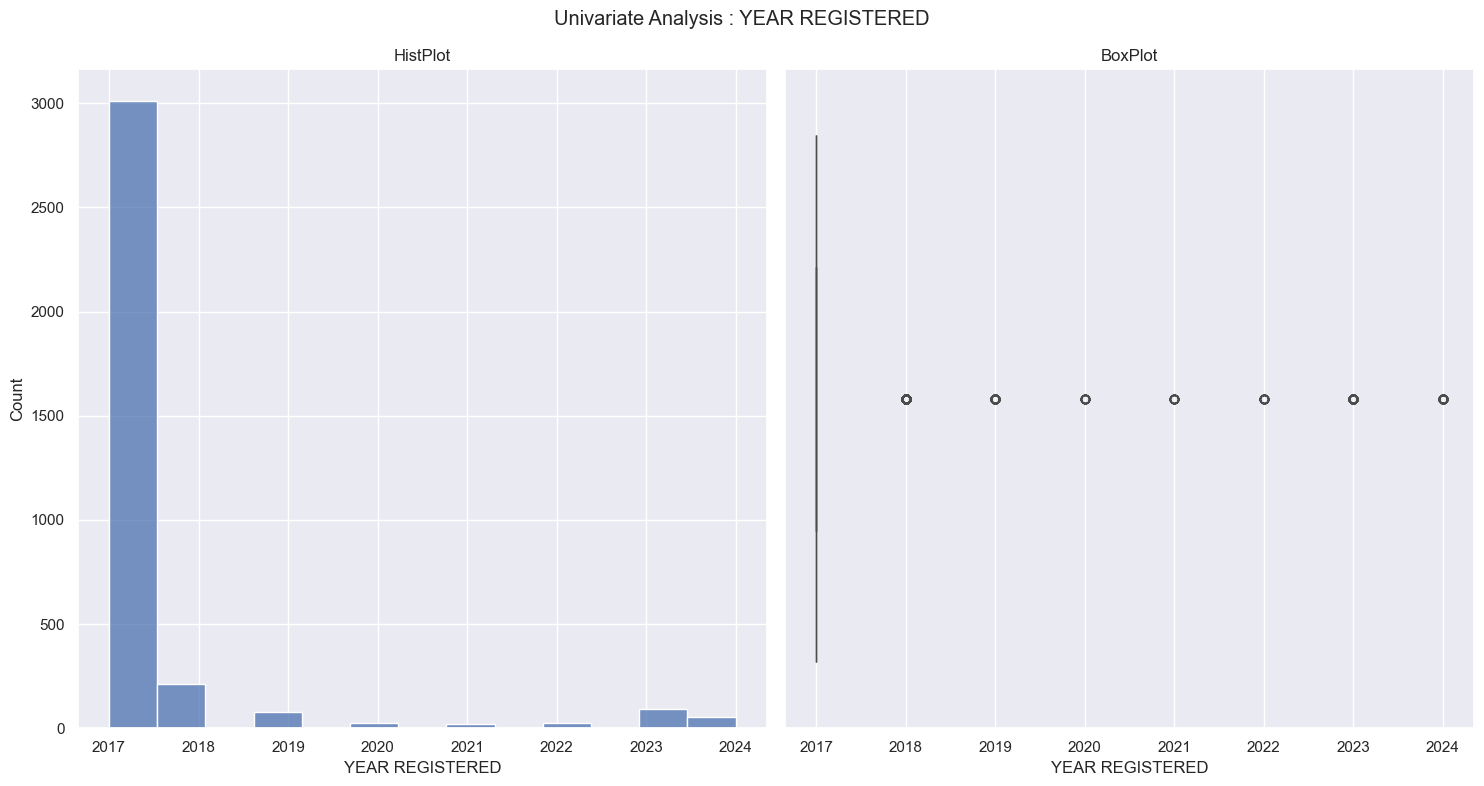

In [7]:
univariate_plot(df_curr, "YEAR REGISTERED")

**YEAR BUILT**

In [8]:
df_curr["YEAR BUILT"].describe().reset_index().T

0            1          2       3       4       5       6  \
index        count         mean        std     min     25%     50%     75%   
YEAR BUILT  3555.0  1962.168776  20.203152  1805.0  1955.0  1962.0  1970.0   

                 7  
index          max  
YEAR BUILT  2023.0

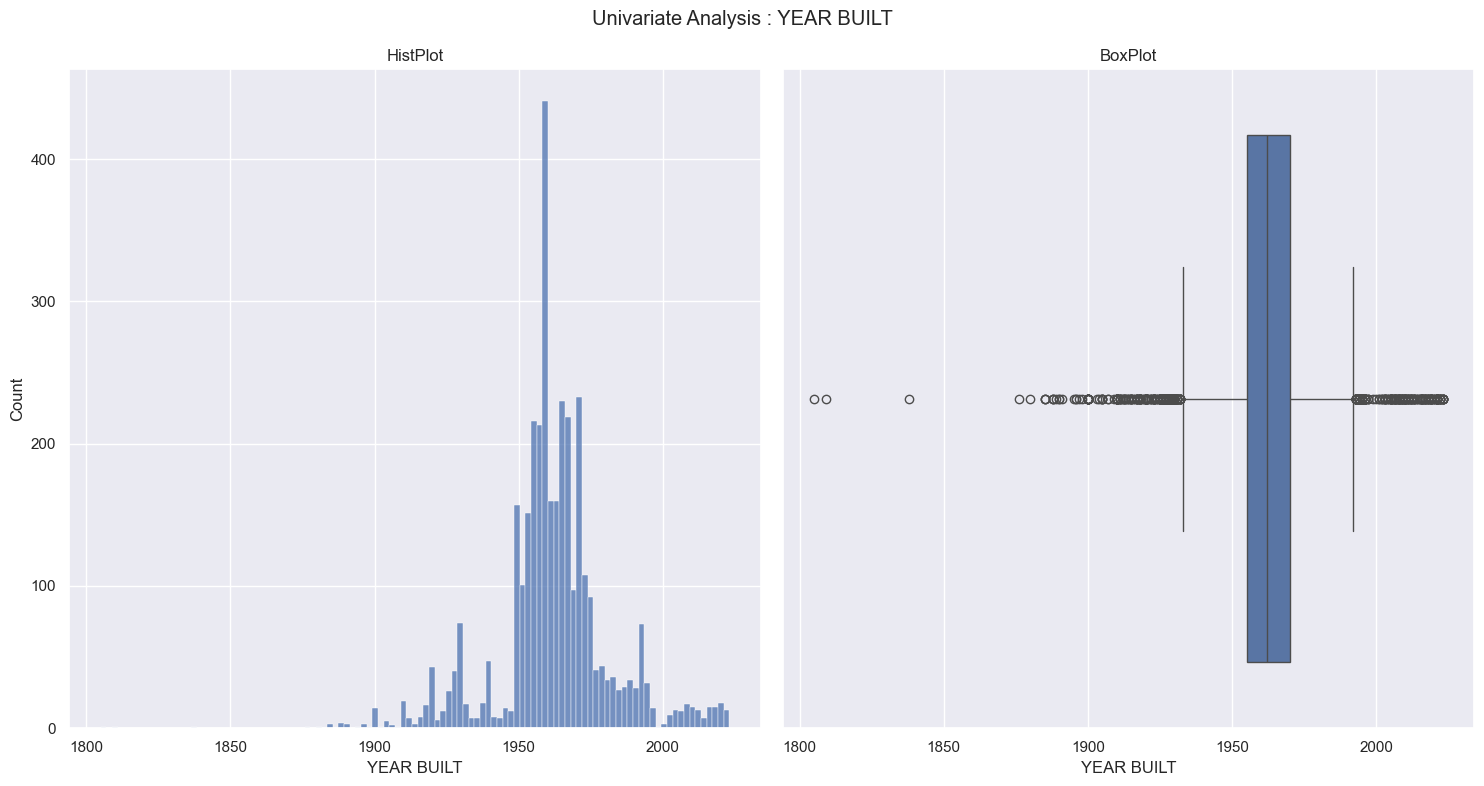

In [9]:
univariate_plot(df_curr, "YEAR BUILT")

**YEAR EVALUATED**

In [10]:
df_curr["YEAR EVALUATED"].describe().reset_index().T

0            1         2       3       4       5       6  \
index            count         mean       std     min     25%     50%     75%   
YEAR EVALUATED  3572.0  2023.507839  0.500009  2023.0  2023.0  2024.0  2024.0   

                     7  
index              max  
YEAR EVALUATED  2024.0

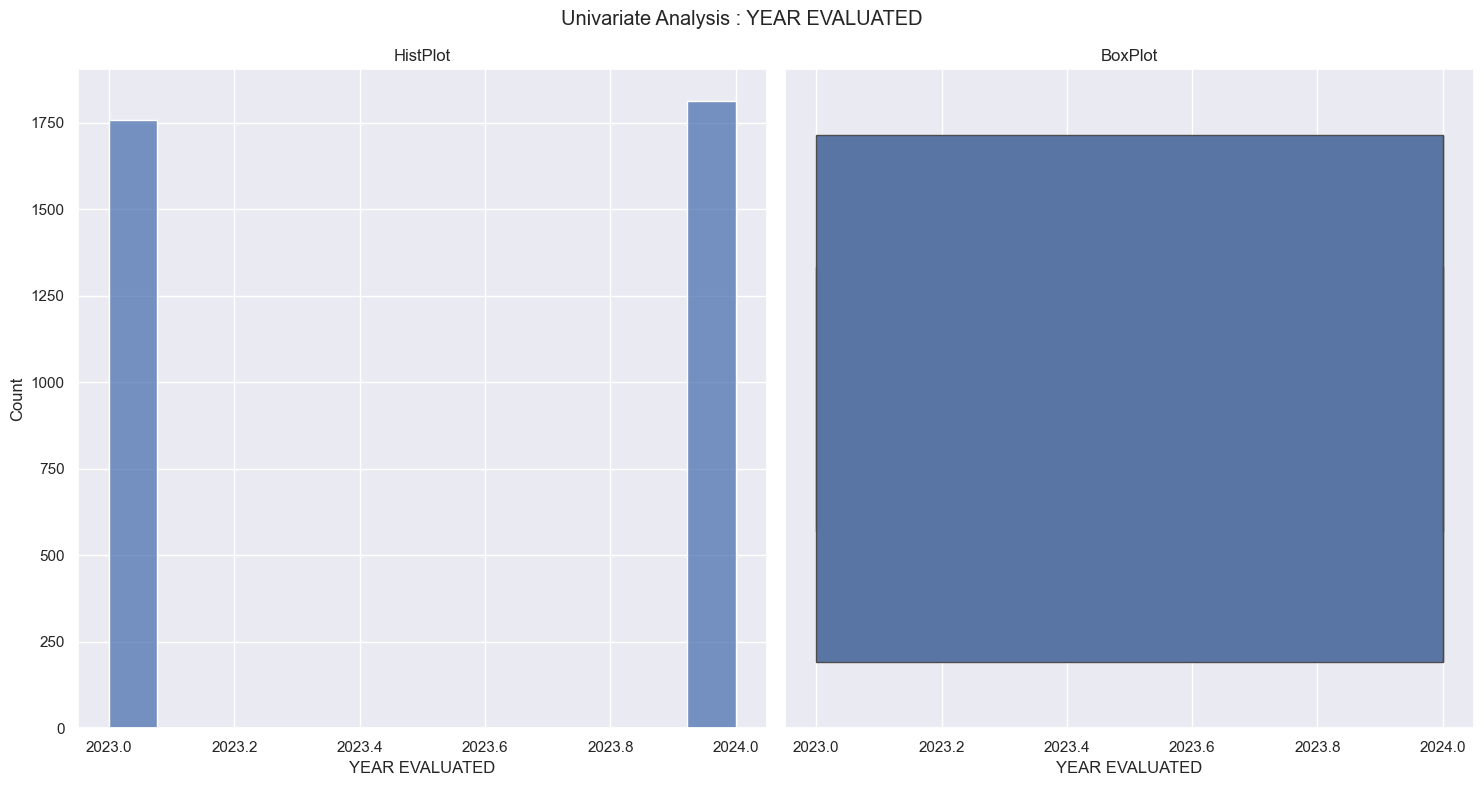

In [11]:
univariate_plot(df_curr, "YEAR EVALUATED")

**CONFIRMED STOREYS**

In [12]:
df_curr["CONFIRMED STOREYS"].describe().reset_index().T

0         1         2    3    4    5     6     7
index               count      mean       std  min  25%  50%   75%   max
CONFIRMED STOREYS  3572.0  7.775476  6.491964  3.0  3.0  4.0  10.0  51.0

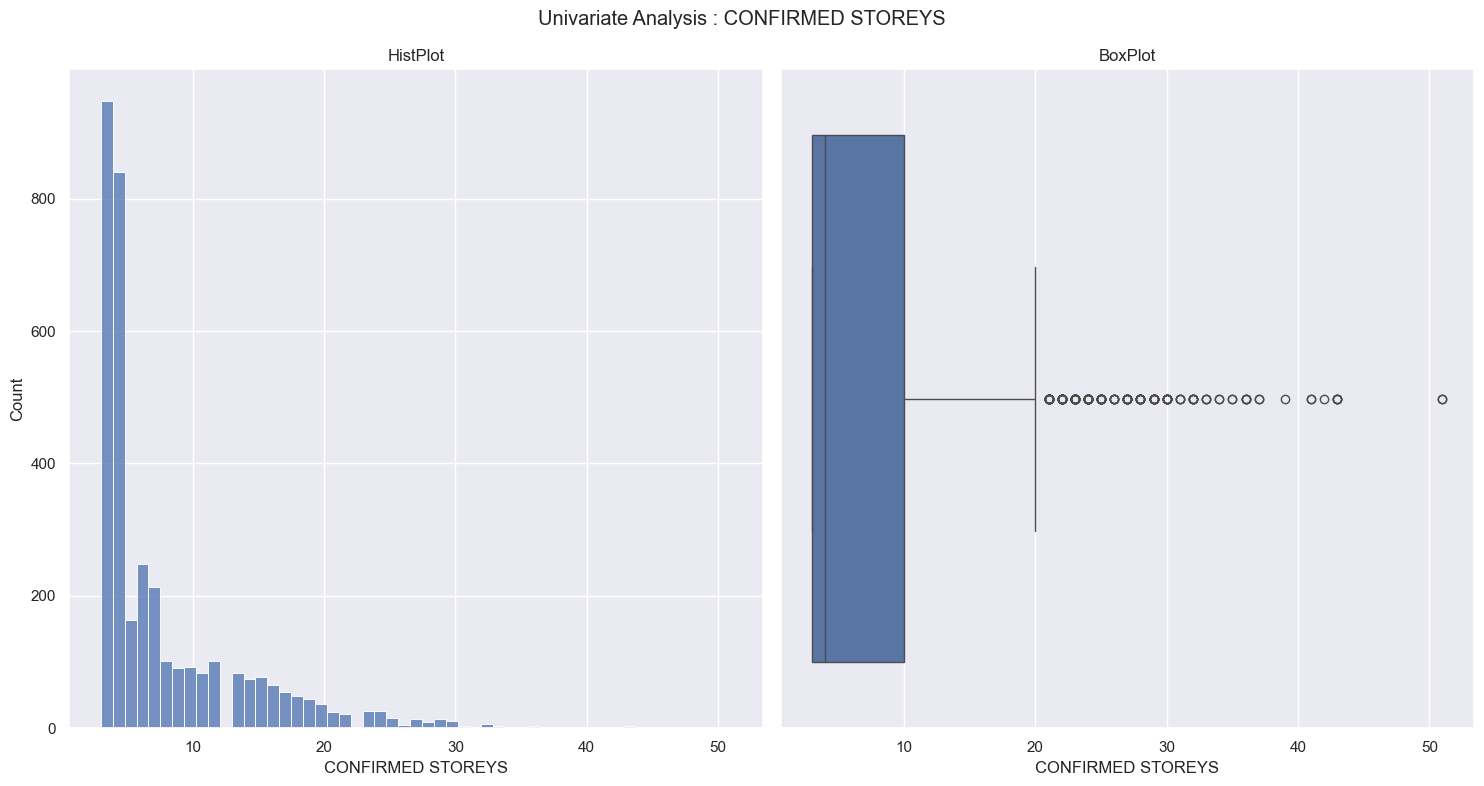

In [13]:
univariate_plot(df_curr, "CONFIRMED STOREYS")

**CONFIRMED UNITS**

In [14]:
df_curr["CONFIRMED UNITS"].describe().reset_index().T

0          1          2     3     4     5      6      7
index             count       mean        std   min   25%   50%    75%    max
CONFIRMED UNITS  3572.0  89.830627  97.343198  10.0  23.0  50.0  125.0  793.0

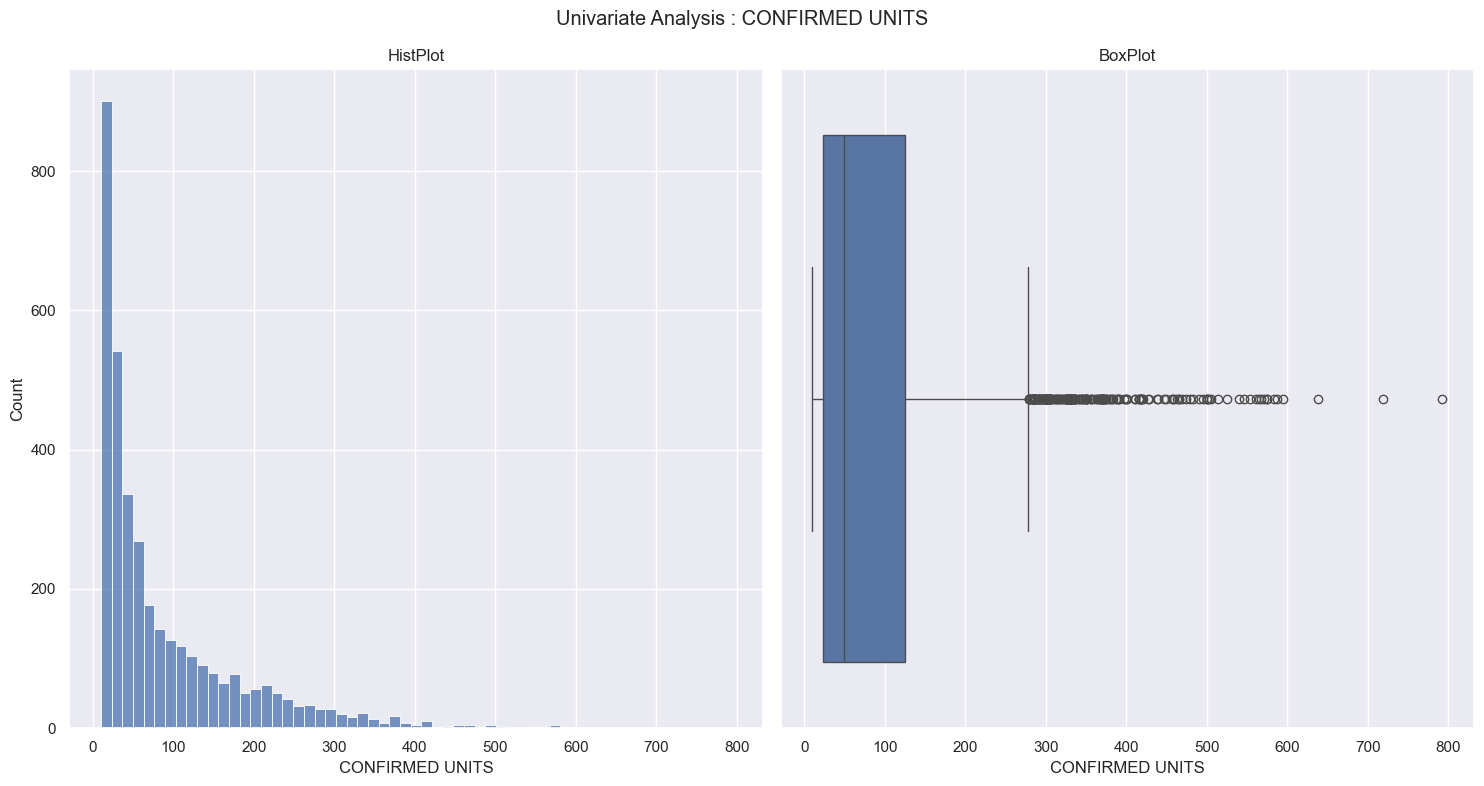

In [15]:
univariate_plot(df_curr, "CONFIRMED UNITS")

**CURRENT BUILDING EVAL SCORE**

In [16]:
df_curr["CURRENT BUILDING EVAL SCORE"].describe().reset_index().T

0          1         2     3     4     5  \
index                         count       mean       std   min   25%   50%   
CURRENT BUILDING EVAL SCORE  3572.0  87.149804  8.781738  17.0  83.0  89.0   

                                6      7  
index                         75%    max  
CURRENT BUILDING EVAL SCORE  93.0  100.0

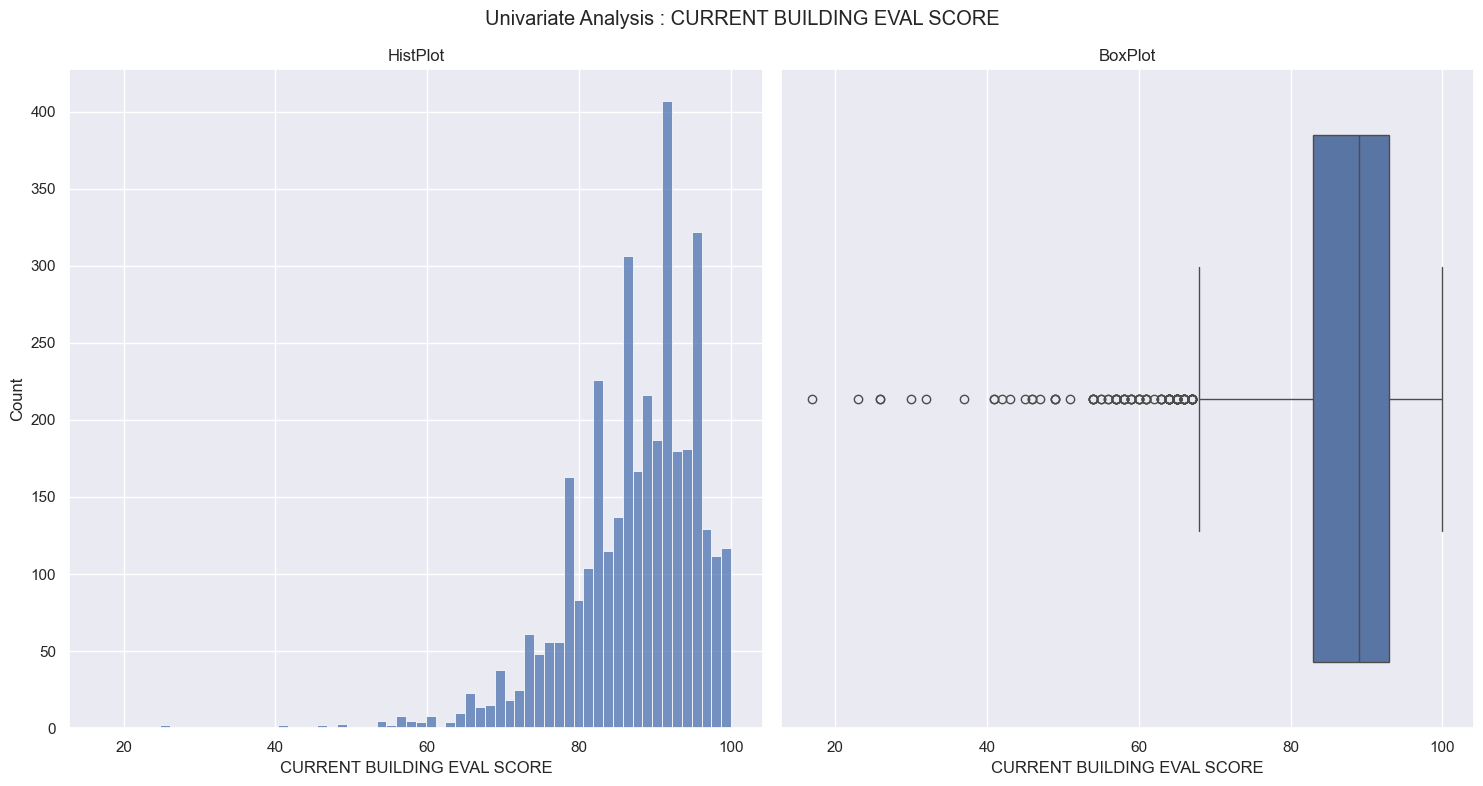

In [17]:
univariate_plot(df_curr, "CURRENT BUILDING EVAL SCORE")

**PROACTIVE BUILDING SCORE**

In [18]:
df_curr["PROACTIVE BUILDING SCORE"].describe().reset_index().T

0          1        2     3     4     5     6  \
index                      count       mean      std   min   25%   50%   75%   
PROACTIVE BUILDING SCORE  3572.0  87.314418  8.67695  17.0  83.0  89.0  93.0   

                              7  
index                       max  
PROACTIVE BUILDING SCORE  100.0

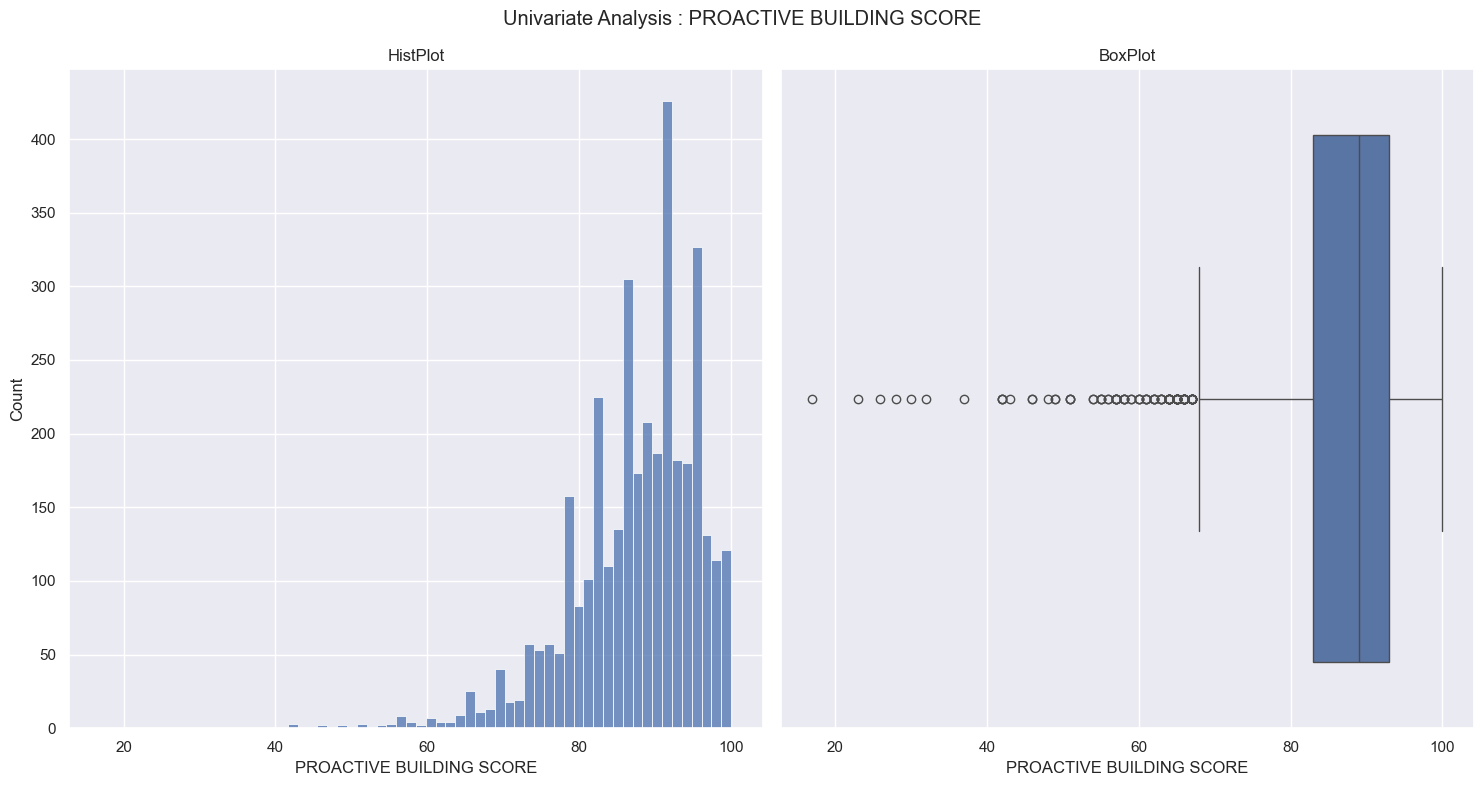

In [19]:
univariate_plot(df_curr, "PROACTIVE BUILDING SCORE")

**CURRENT REACTIVE SCORE**

In [20]:
df_curr["CURRENT REACTIVE SCORE"].describe().reset_index().T

0         1         2     3    4    5    6    7
index                    count      mean       std   min  25%  50%  75%  max
CURRENT REACTIVE SCORE  3572.0 -0.164614  0.583351 -14.0  0.0  0.0  0.0  0.0

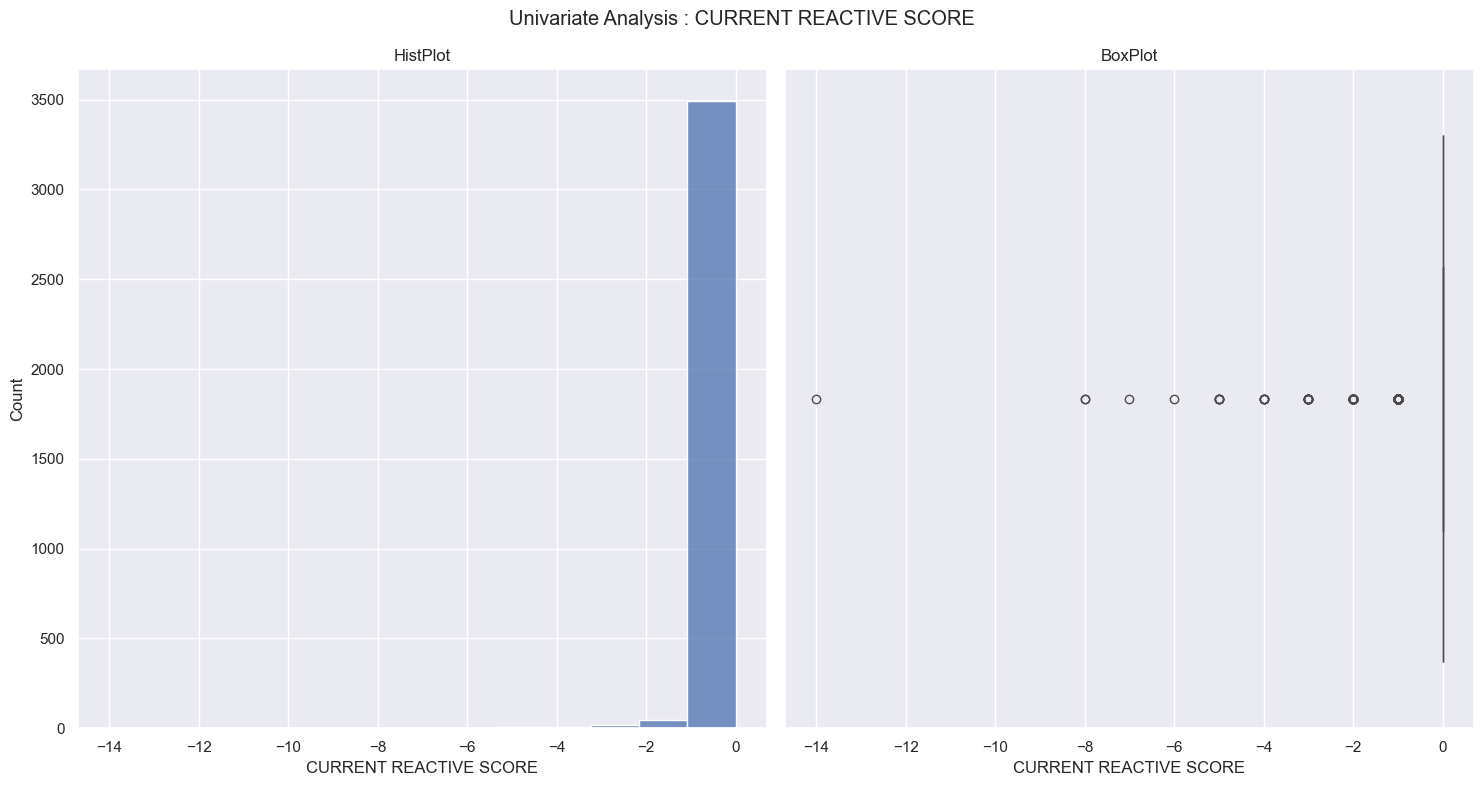

In [21]:
univariate_plot(df_curr, "CURRENT REACTIVE SCORE")

**NO OF AREAS EVALUATED**

In [22]:
df_curr["NO OF AREAS EVALUATED"].describe().reset_index().T

0          1         2     3     4     5     6  \
index                   count       mean       std   min   25%   50%   75%   
NO OF AREAS EVALUATED  3572.0  41.214726  3.675065  27.0  38.0  42.0  44.0   

                          7  
index                   max  
NO OF AREAS EVALUATED  49.0

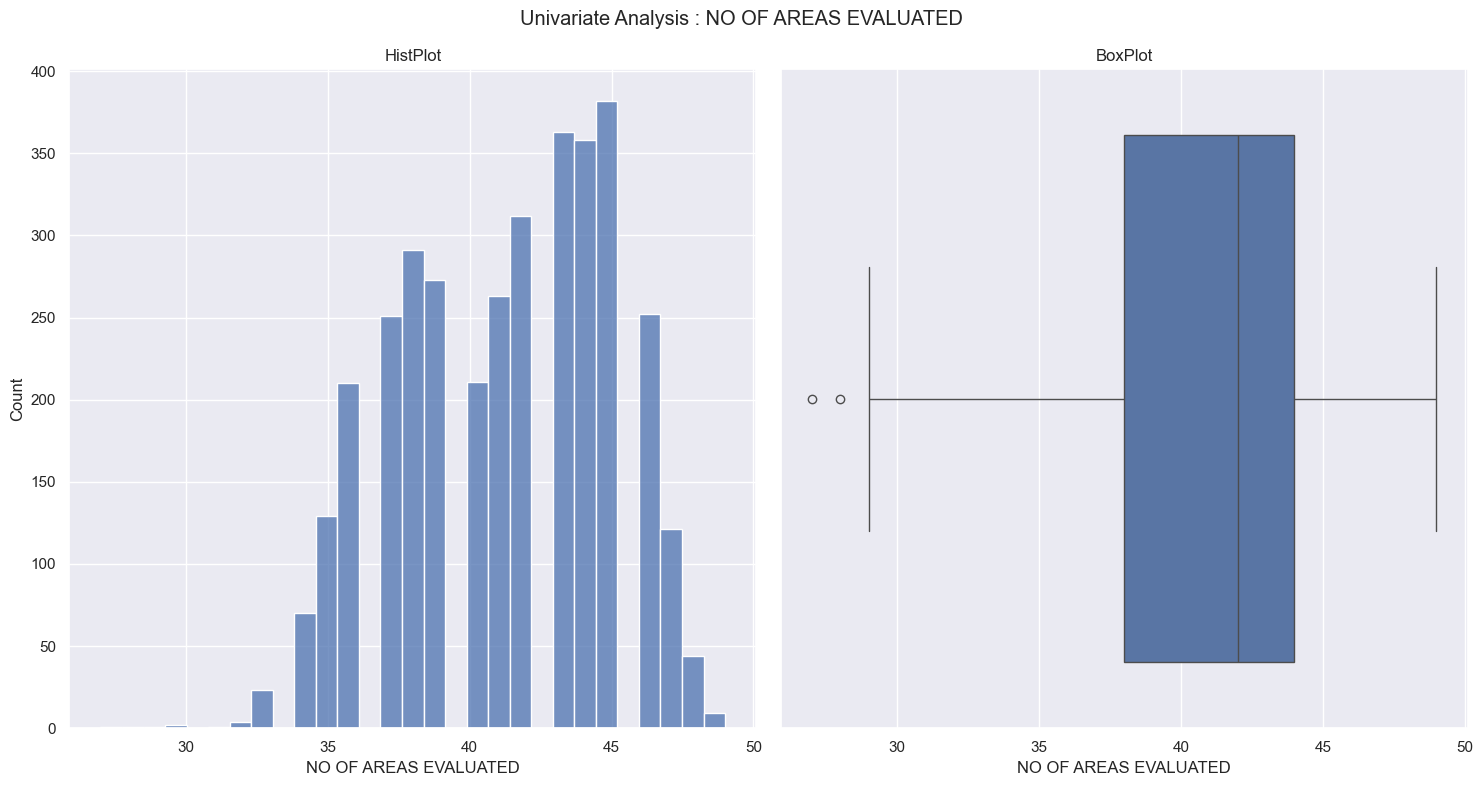

In [23]:
univariate_plot(df_curr, "NO OF AREAS EVALUATED")

### Bivariate Analysis

**YEAR BUILT vs CURRENT BUILDING EVAL SCORE**

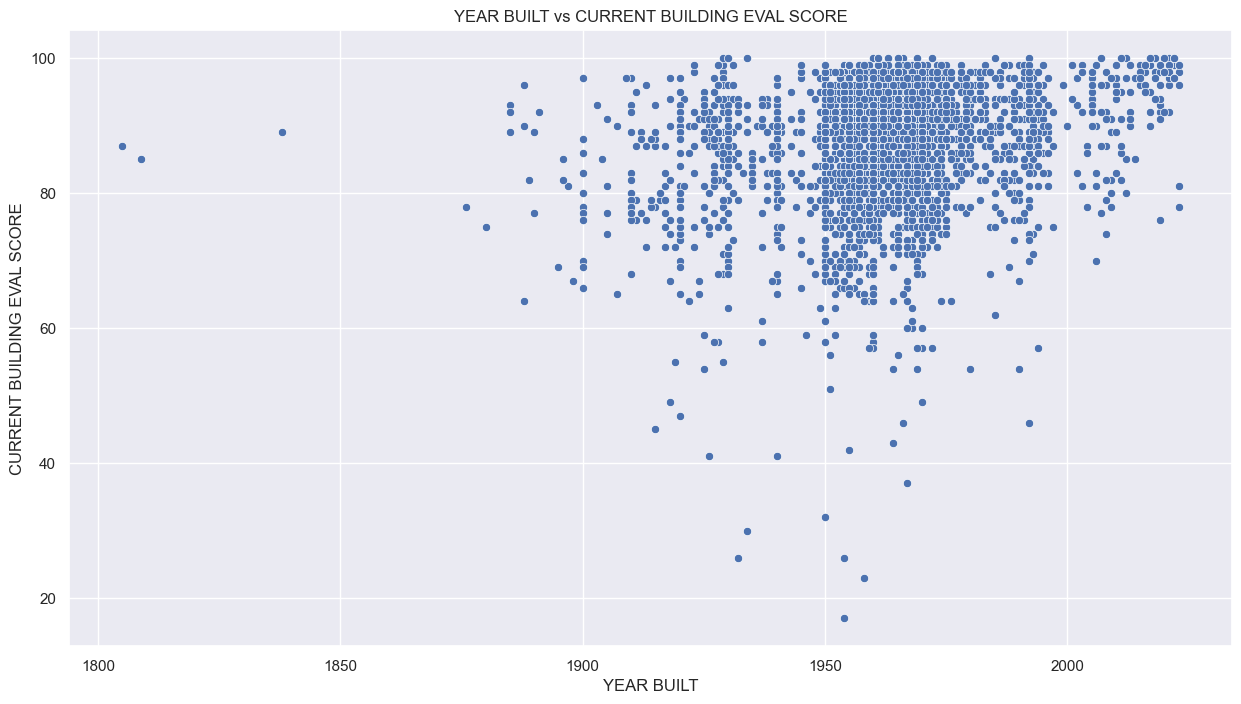

In [24]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_curr, x = "YEAR BUILT", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR BUILT vs CURRENT BUILDING EVAL SCORE")
plt.show()

**CONFIRMED UNITS vs PROACTIVE BUILDING SCORE**

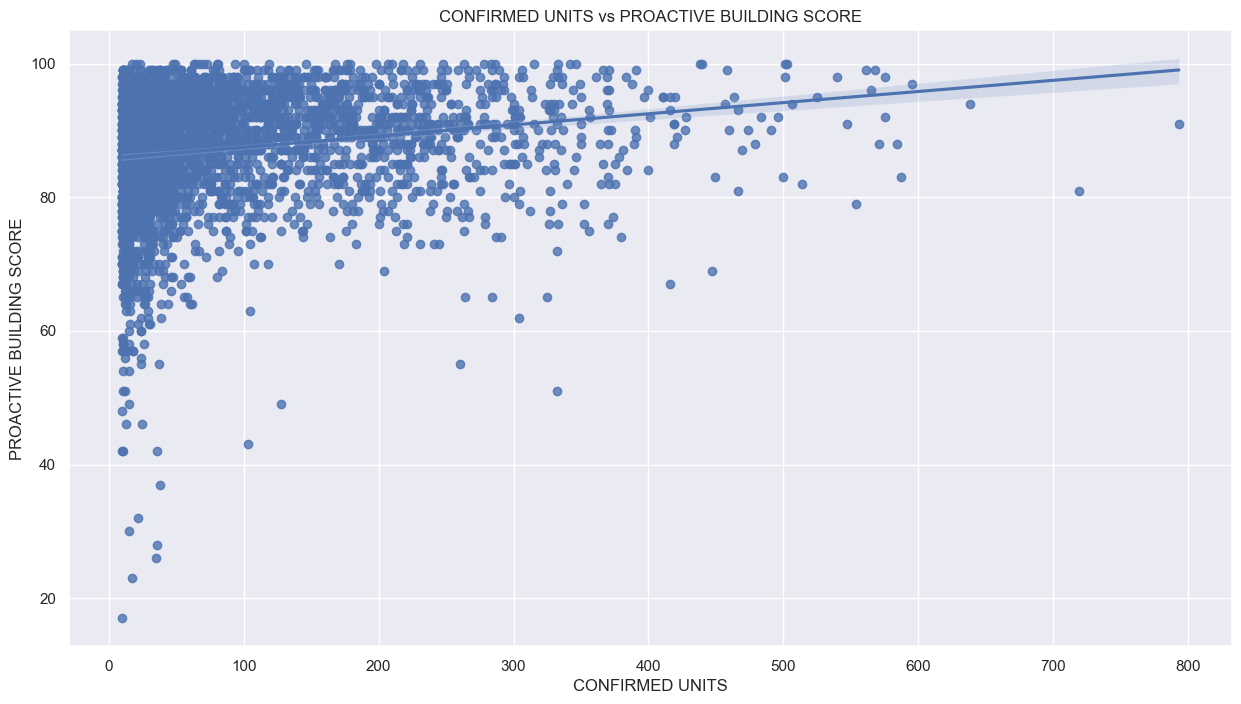

In [25]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_curr, x = "CONFIRMED UNITS", y = "PROACTIVE BUILDING SCORE")
plt.title("CONFIRMED UNITS vs PROACTIVE BUILDING SCORE")
plt.show()

**WARD vs CURRENT BUILDING EVAL SCORE**

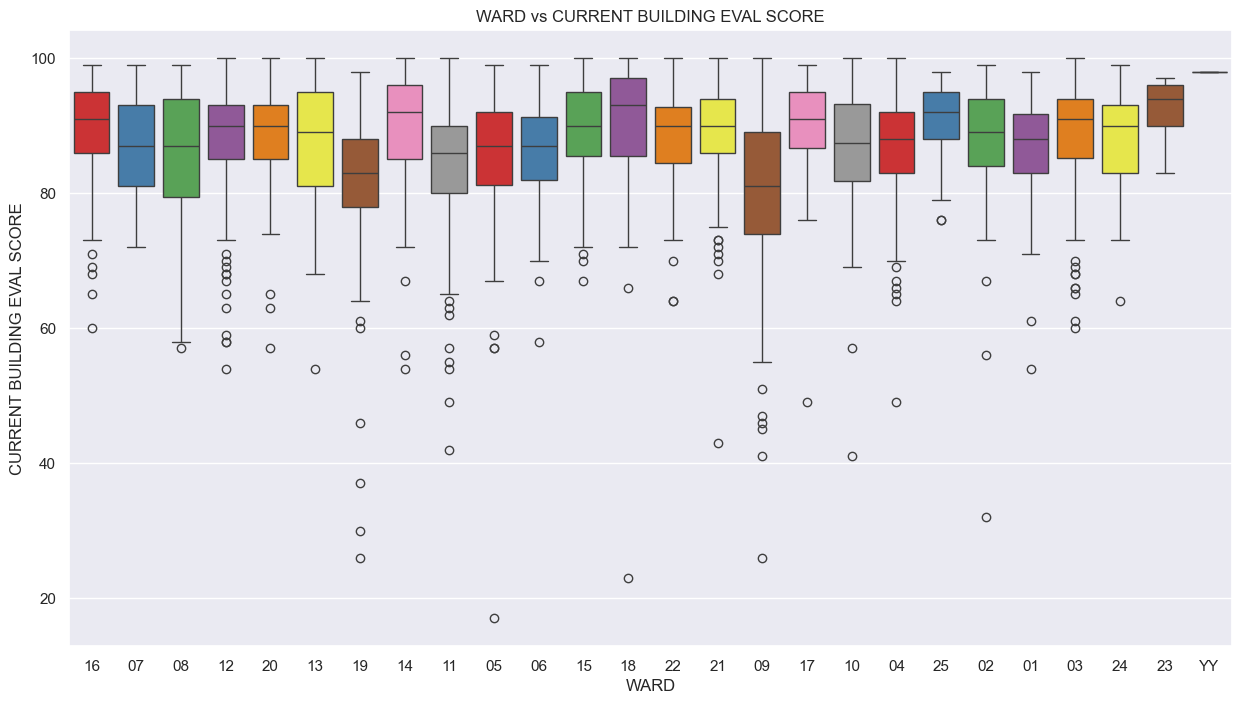

In [26]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_curr, x = "WARD", y = "CURRENT BUILDING EVAL SCORE", palette = "Set1")
plt.title("WARD vs CURRENT BUILDING EVAL SCORE")
plt.show()

**PROPERTY TYPE vs CURRENT REACTIVE SCORE**

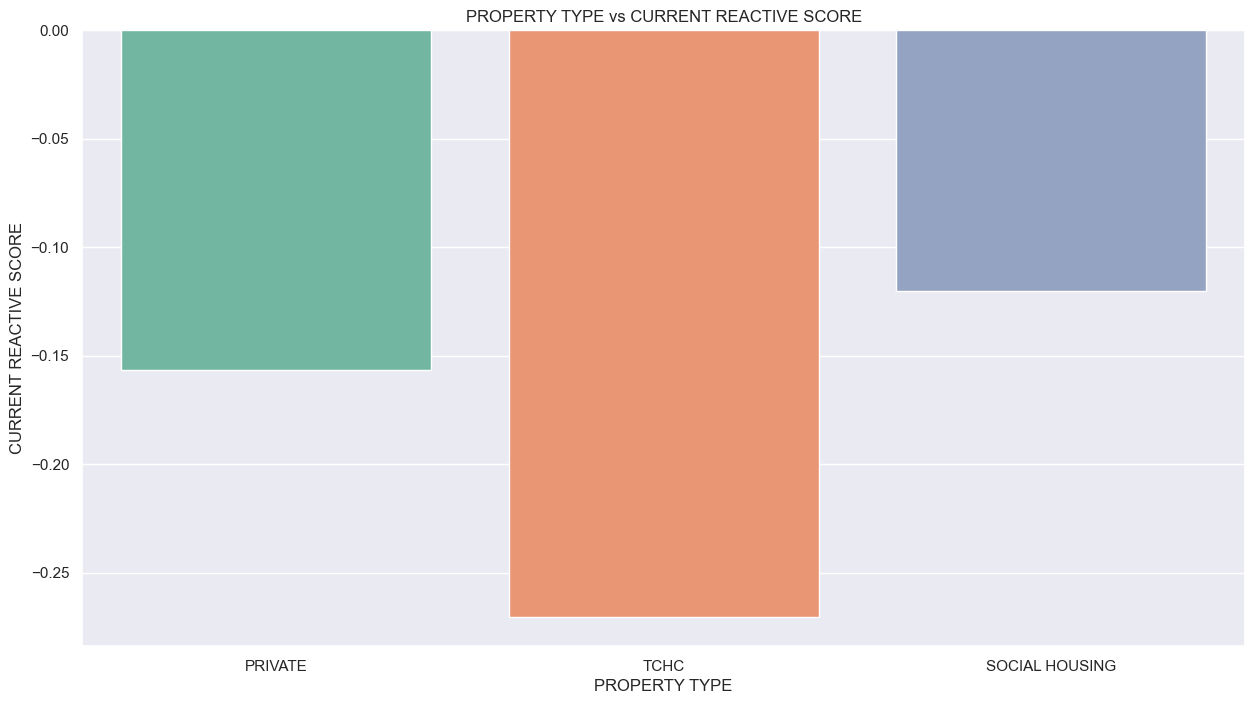

In [27]:
plt.figure(figsize = [15,8])
sns.barplot(data = df_curr, x = "PROPERTY TYPE", y = "CURRENT REACTIVE SCORE", palette = "Set2", errorbar=('ci', 0))
plt.title("PROPERTY TYPE vs CURRENT REACTIVE SCORE")
plt.show()

**YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE**

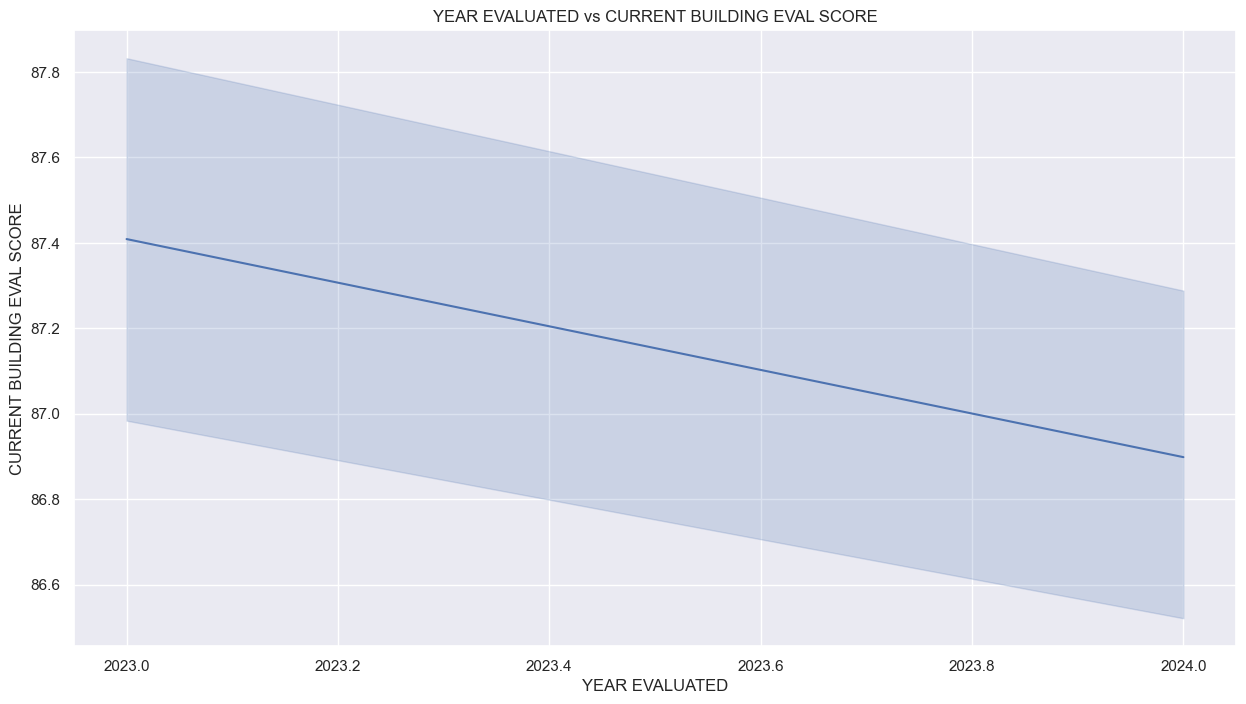

In [28]:
plt.figure(figsize = [15,8])
sns.lineplot(data = df_curr, x = "YEAR EVALUATED", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE")
plt.show()

### Multivariate Analysis

**YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE**

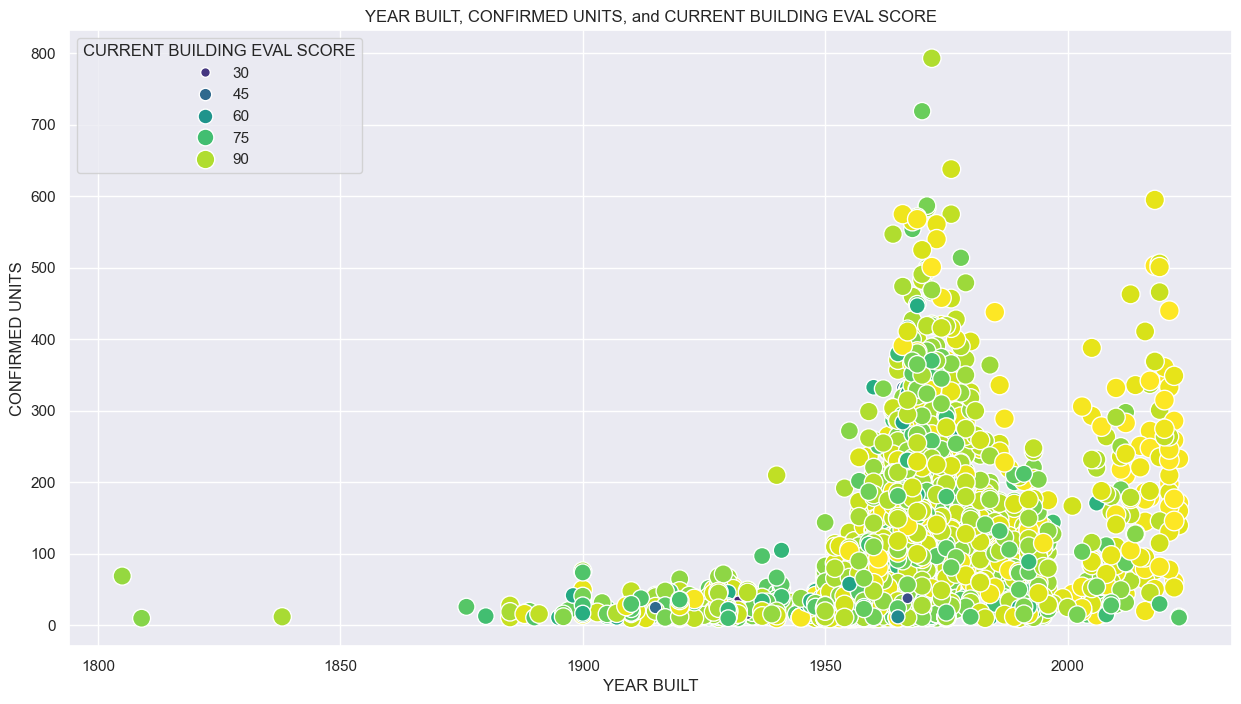

In [29]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_curr, x = 'YEAR BUILT', y = 'CONFIRMED UNITS', 
                hue='CURRENT BUILDING EVAL SCORE', palette = 'viridis', 
                size = 'CURRENT BUILDING EVAL SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE")
plt.show()

**PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE**

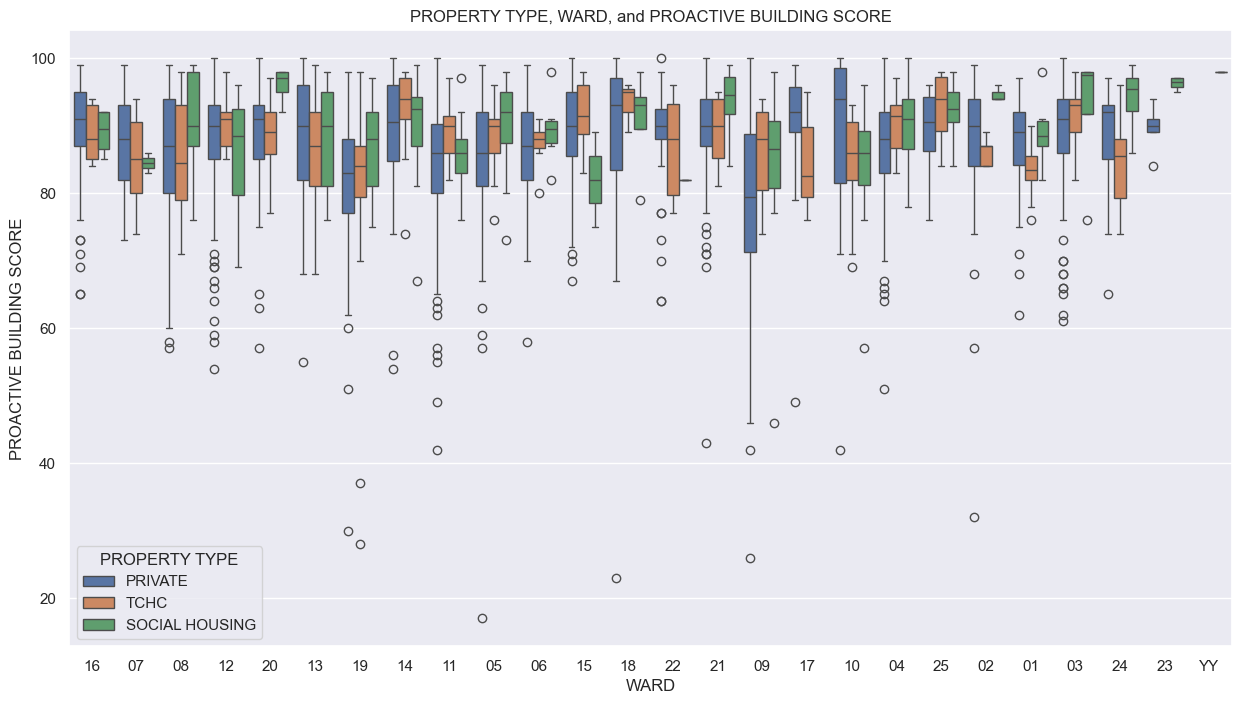

In [30]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_curr, x = 'WARD', y = 'PROACTIVE BUILDING SCORE', hue = 'PROPERTY TYPE')
plt.title('PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE')
plt.show()

**LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE**

In [31]:
fig = px.scatter_mapbox(df_curr, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "CURRENT BUILDING EVAL SCORE",
                        size = "CURRENT BUILDING EVAL SCORE",
                        hover_name = "SITE ADDRESS",
                        hover_data = ["YEAR BUILT", "CONFIRMED UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

**ANALYSING DATA FROM 2017 TO 2023**

In [32]:
df_old = pd.read_csv("Pre-2023 Apartment Building Evaluations.csv")
df_old.head()

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT PROPERTY_TYPE  \
0    1  4304347              NaN             NaN      1999.0       PRIVATE   
1    2  5156815           2023.0             NaN      1973.0          TCHC   
2    3  5156814           2023.0             NaN      1973.0          TCHC   
3    4  5157421           2023.0             NaN      1973.0          TCHC   
4    5  5156871           2023.0             NaN      1973.0          TCHC   

   WARD          WARDNAME                              SITE_ADDRESS  \
0     2  Etobicoke Centre  ** CREATED IN ERROR ** 399 THE WEST MALL   
1    17  Don Valley North                        15 FIELD SPARROWAY   
2    17  Don Valley North                        13 FIELD SPARROWAY   
3    17  Don Valley North                          6 TREE SPARROWAY   
4    17  Don Valley North                          2 TREE SPARROWAY   

   CONFIRMED_STOREYS  ...  EXTERIOR_WALKWAYS BALCONY_GUARDS  \
0                 22  ...                5.0            5.0   
1                  4  ...                5.0            5.0   
2                  4  ...                4.0            5.0   
3                  4  ...                3.0            5.0   
4                  4  ...                5.0            5.0   

   WATER_PEN_EXT_BLDG_ELEMENTS PARKING_AREA  OTHER_FACILITIES   GRID  \
0                          5.0          5.0               5.0  W0233   
1                          4.0          3.0               4.0  N1721   
2                          4.0          3.0               4.0  N1721   
3                          4.0          3.0               4.0  N1721   
4                          4.0          3.0               4.0  N1721   

    LATITUDE  LONGITUDE           X            Y  
0  43.643781 -79.565456  299503.625  4833538.964  
1  43.791143 -79.368820  315333.193  4849916.905  
2  43.790920 -79.368771  315334.815  4849906.373  
3  43.791384 -79.369630  315272.148  4849932.515  
4  43.791511 -79.369045  315330.308  4849947.465  

[5 rows x 40 columns]

In [33]:
df_old.shape

(11760, 40)

In [34]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [35]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_EVALUATED               9751 non-null   float64
 4   YEAR_BUILT                   11714 non-null  float64
 5   PROPERTY_TYPE                11760 non-null  object 
 6   WARD                         11760 non-null  int64  
 7   WARDNAME                     11760 non-null  object 
 8   SITE_ADDRESS                 11760 non-null  object 
 9   CONFIRMED_STOREYS            11760 non-null  int64  
 10  CONFIRMED_UNITS              11760 non-null  int64  
 11  EVALUATION_COMPLETED_ON      11760 non-null  object 
 12  SCORE                        11760 non-null  int64  
 13  RESULTS_OF_SCORE

In [36]:
df_old.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  11760.000000  1.176000e+04     11455.000000     9751.000000   
mean    5880.500000  4.171812e+06      2017.164033     2018.564968   
std     3394.963917  8.183299e+04         0.605889        1.467689   
min        1.000000  4.152554e+06      2017.000000     2017.000000   
25%     2940.750000  4.153701e+06      2017.000000     2017.000000   
50%     5880.500000  4.154620e+06      2017.000000     2018.000000   
75%     8820.250000  4.155548e+06      2017.000000     2020.000000   
max    11760.000000  5.207679e+06      2023.000000     2021.000000   

         YEAR_BUILT          WARD  CONFIRMED_STOREYS  CONFIRMED_UNITS  \
count  11714.000000  11760.000000       11760.000000     11760.000000   
mean    1961.077258     10.855357           7.629592        87.920408   
std       18.923485      6.332947           6.245635        95.349729   
min     1805.000000      1.000000           3.000000        10.000000   
25%     1955.000000      5.000000           3.000000        24.000000   
50%     1961.000000     11.000000           4.000000        48.000000   
75%     1970.000000     16.000000          10.000000       120.000000   
max     2022.000000     25.000000          51.000000       793.000000   

              SCORE  NO_OF_AREAS_EVALUATED  ...  EXTERIOR_GROUNDS  \
count  11760.000000           11760.000000  ...      11745.000000   
mean      73.826956              17.141327  ...          3.650575   
std       10.566185               1.691816  ...          0.754074   
min        0.000000               0.000000  ...          1.000000   
25%       66.000000              16.000000  ...          3.000000   
50%       74.000000              17.000000  ...          4.000000   
75%       81.000000              19.000000  ...          4.000000   
max      100.000000              20.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count       11754.000000     7973.000000                 11754.000000   
mean            3.643866        3.752665                     3.668453   
std             0.744887        0.833194                     0.739714   
min             1.000000        1.000000                     1.000000   
25%             3.000000        3.000000                     3.000000   
50%             4.000000        4.000000                     4.000000   
75%             4.000000        4.000000                     4.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES      LATITUDE     LONGITUDE  \
count  10704.000000       2254.000000  11529.000000  11529.000000   
mean       3.392096          4.019521     43.699570    -79.408752   
std        0.757125          0.795332      0.043897      0.088020   
min        1.000000          1.000000     43.588276    -79.614871   
25%        3.000000          4.000000     43.668211    -79.480110   
50%        3.000000          4.000000     43.698930    -79.419515   
75%        4.000000          5.000000     43.731024    -79.346769   
max        5.000000          5.000000     43.813943    -79.149243   

                   X             Y  
count   11667.000000  1.166700e+04  
mean   312133.360552  4.839722e+06  
std      7086.682471  4.863705e+03  
min    295530.634000  4.827372e+06  
25%    306397.990500  4.836247e+06  
50%    311309.741000  4.839640e+06  
75%    317059.926000  4.843209e+06  
max    332968.256000  4.852475e+06  

[8 rows x 34 columns]

In [37]:
df_curr.columns = df_curr.columns.str.replace(" ", "_")

**CURRENT_BUILDING_EVAL_SCORE**

In [38]:
df_curr.rename(columns = {"CURRENT_BUILDING_EVAL_SCORE": "SCORE"}, inplace = True)

**RESULTS_OF_SCORE**

In [39]:
df_old['RESULTS_OF_SCORE'].unique()

array(['Evaluation needs to be conducted in 3 years',
       'Evaluation needs to be conducted in 2 years',
       'Evaluation needs to be conducted in 1 year', 'Building Audit'],
      dtype=object)

In [40]:
print(f"Evaluation needs to be conducted in 1 year min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].min()}")
print(f"Evaluation needs to be conducted in 1 year max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].max()}")
print(f"Evaluation needs to be conducted in 2 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].min()}")
print(f"Evaluation needs to be conducted in 2 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].max()}")
print(f"Evaluation needs to be conducted in 3 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].min()}")
print(f"Evaluation needs to be conducted in 3 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].max()}")
print(f"Building Audit min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].min()}")
print(f"Building Audit max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].max()}")

Evaluation needs to be conducted in 1 year min 51
Evaluation needs to be conducted in 1 year max 65
Evaluation needs to be conducted in 2 years min 66
Evaluation needs to be conducted in 2 years max 85
Evaluation needs to be conducted in 3 years min 86
Evaluation needs to be conducted in 3 years max 100
Building Audit min 0
Building Audit max 50


In [41]:
df_curr['RESULTS_OF_SCORE'] = df_curr['SCORE'].apply(
    lambda x: 'Building Audit' if x < 50 else
              'Evaluation needs to be conducted in 1 year' if x < 66 else
              'Evaluation needs to be conducted in 2 years' if x < 85 else
              'Evaluation needs to be conducted in 3 years'
)

In [42]:
df_curr['SCORE'][df_curr['RESULTS_OF_SCORE'] == 'Evaluation needs to be conducted in 3 years'].count()

2461

**ENTRANCE_LOBBY :- LOBBY_-_WALLS_AND_CEILING + LOBBY_FLOORS**

In [43]:
df_old['ENTRANCE_LOBBY'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [44]:
df_curr['LOBBY_-_WALLS_AND_CEILING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [45]:
df_curr['LOBBY_FLOORS'].unique()

array(['3', '2', '1', nan, '0', ' 1', ' N/A'], dtype=object)

In [46]:
df_curr['LOBBY_FLOORS'] = pd.to_numeric(
    df_curr['LOBBY_FLOORS'].str.strip(), errors = 'coerce'
)

df_curr['ENTRANCE_LOBBY'] = df_curr['LOBBY_-_WALLS_AND_CEILING'] + df_curr['LOBBY_FLOORS']

bins = [round(df_curr['ENTRANCE_LOBBY'].max()/5 * i, 2) for i in range(0,6)]
df_curr["ENTRANCE_LOBBY"] = np.where(df_curr["ENTRANCE_LOBBY"].isnull(), -1, pd.cut(df_curr["ENTRANCE_LOBBY"], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ENTRANCE_LOBBY'].value_counts()

ENTRANCE_LOBBY
 5.0    2816
 4.0     572
 3.0      96
 2.0      54
-1.0      28
 1.0       6
Name: count, dtype: int64

**ELEVATORS :- ELEVATOR_COSMETICS + ELEVATOR_MAINTENANCE**

In [47]:
df_curr['ELEVATOR_COSMETICS'].unique()

array(['2', '3', nan, '1', '0', ' N/A'], dtype=object)

In [48]:
df_curr['ELEVATOR_MAINTENANCE'].unique()

array(['3', nan, '1', '2', '0', ' 3', ' N/A'], dtype=object)

In [49]:
df_old['ELEVATORS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [50]:
df_curr['ELEVATOR_COSMETICS'] = pd.to_numeric(
    df_curr['ELEVATOR_COSMETICS'].str.strip(), errors='coerce'
)

df_curr['ELEVATOR_MAINTENANCE'] = pd.to_numeric(
    df_curr['ELEVATOR_MAINTENANCE'].str.strip(), errors='coerce'
)

df_curr['ELEVATORS'] = df_curr['ELEVATOR_COSMETICS'] + df_curr['ELEVATOR_MAINTENANCE']

bins = [round(df_curr['ELEVATORS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['ELEVATORS'] = np.where(df_curr['ELEVATORS'].isnull(), -1, pd.cut(df_curr['ELEVATORS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ELEVATORS'].value_counts()

ELEVATORS
 5.0    2061
-1.0    1442
 4.0      51
 1.0       9
 3.0       5
 2.0       4
Name: count, dtype: int64

**ENTRANCE_DOORS_WINDOWS :- WINDOWS + EXTERIOR_DOORS**

In [51]:
df_old['ENTRANCE_DOORS_WINDOWS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [52]:
df_curr['WINDOWS'].unique()

array([ 3.,  2.,  1., nan])

In [53]:
df_curr['EXTERIOR_DOORS'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [54]:
df_curr['ENTRANCE_DOORS_WINDOWS'] = df_curr['EXTERIOR_DOORS'] + df_curr['WINDOWS']

bins = [round(df_curr['ENTRANCE_DOORS_WINDOWS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['ENTRANCE_DOORS_WINDOWS'] = np.where(df_curr['ENTRANCE_DOORS_WINDOWS'].isnull(), -1, pd.cut(df_curr['ENTRANCE_DOORS_WINDOWS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ENTRANCE_DOORS_WINDOWS'].value_counts()

ENTRANCE_DOORS_WINDOWS
 5.0    2853
 4.0     563
 3.0     130
 2.0      21
-1.0       5
Name: count, dtype: int64

**LAUNDRY_ROOMS :- LAUNDRY_ROOM**

In [55]:
df_old["LAUNDRY_ROOMS"].unique()

array([ 5., nan,  2.,  4.,  3.,  1.])

In [56]:
df_curr["LAUNDRY_ROOM"].unique()

array(['3', '2', nan, '0', '1', ' 2', ' N/A'], dtype=object)

In [57]:
df_curr['LAUNDRY_ROOMS'] = pd.to_numeric(
    df_curr['LAUNDRY_ROOM'].str.strip(), errors='coerce'
)

bins = [round(df_curr['LAUNDRY_ROOMS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['LAUNDRY_ROOMS'] = np.where(df_curr['LAUNDRY_ROOMS'].isnull(), -1, pd.cut(df_curr['LAUNDRY_ROOMS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['LAUNDRY_ROOMS'].value_counts()

LAUNDRY_ROOMS
 5.0    1962
 4.0    1240
-1.0     173
 2.0     170
 1.0      27
Name: count, dtype: int64

**EXTERIOR_CLADDING :- BUILDING_EXTERIOR**

In [58]:
df_old['EXTERIOR_CLADDING'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [59]:
df_curr['BUILDING_EXTERIOR'].unique()

array([ 3.,  2., nan,  1.,  0.])

In [60]:
df_curr['EXTERIOR_CLADDING'] = pd.to_numeric(df_curr['BUILDING_EXTERIOR'], errors='coerce')

def scale_exterior(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])
    elif value == 0:
        return 0 
    else:
        return np.nan 

df_curr['EXTERIOR_CLADDING'] = df_curr['EXTERIOR_CLADDING'].apply(scale_exterior)

df_curr['EXTERIOR_CLADDING'].value_counts()

EXTERIOR_CLADDING
5.0    1115
4.0     982
3.0     969
1.0     252
2.0     244
0.0       1
Name: count, dtype: int64

**GARBAGE_BIN_STORAGE_AREA :- GARBAGE/COMPACTOR_ROOM + EXT._RECEPTACLE_STORAGE_AREA + INT._RECEPTACLE_STORAGE_AREA**

In [61]:
df_old['GARBAGE_BIN_STORAGE_AREA'].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [62]:
df_curr['GARBAGE/COMPACTOR_ROOM'].unique()

array(['3', '2', nan, '1', '0', ' 3', ' N/A', ' 1'], dtype=object)

In [63]:
df_curr['EXT._RECEPTACLE_STORAGE_AREA'].unique()

array(['3', nan, '2', '1', ' 1', ' 2', '0', ' N/A'], dtype=object)

In [64]:
df_curr['INT._RECEPTACLE_STORAGE_AREA'].unique()

array([nan, '2', '3', '0', '1', ' 2', ' 3', ' N/A'], dtype=object)

In [65]:
df_curr['GARBAGE/COMPACTOR_ROOM'] = pd.to_numeric(df_curr['GARBAGE/COMPACTOR_ROOM'], errors='coerce')
df_curr['EXT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_curr['EXT._RECEPTACLE_STORAGE_AREA'], errors='coerce')
df_curr['INT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_curr['INT._RECEPTACLE_STORAGE_AREA'], errors='coerce')

df_curr["GARBAGE_BIN_STORAGE_AREA"] = df_curr['GARBAGE/COMPACTOR_ROOM'] + df_curr['EXT._RECEPTACLE_STORAGE_AREA'] + df_curr['INT._RECEPTACLE_STORAGE_AREA'] 

bins = [round(df_curr['GARBAGE_BIN_STORAGE_AREA'].max()/5 * i, 2) for i in range(0,6)]
df_curr['GARBAGE_BIN_STORAGE_AREA'] = np.where(df_curr['GARBAGE_BIN_STORAGE_AREA'].isnull(), -1, pd.cut(df_curr['GARBAGE_BIN_STORAGE_AREA'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['LAUNDRY_ROOMS'].value_counts()

LAUNDRY_ROOMS
 5.0    1962
 4.0    1240
-1.0     173
 2.0     170
 1.0      27
Name: count, dtype: int64

**GARBAGE_CHUTE_ROOMS :- CHUTE_ROOMS_-_MAINTENANCE**

In [66]:
df_curr['CHUTE_ROOMS_-_MAINTENANCE'].unique()

array([ 2.,  3., nan,  1.,  0.])

In [67]:
df_old['GARBAGE_CHUTE_ROOMS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [68]:
import numpy as np
import pandas as pd

df_curr['CHUTE_ROOMS_-_MAINTENANCE'] = pd.to_numeric(df_curr['CHUTE_ROOMS_-_MAINTENANCE'], errors='coerce')

def map_chute_rooms(value):
    if value == 2:
        return np.random.choice([2, 3])  
    elif value == 3:
        return np.random.choice([4, 5])  
    elif value == 1:
        return 1  
    elif value == 0:
        return 0  
    else:
        return np.nan  

df_curr['GARBAGE_CHUTE_ROOMS'] = df_curr['CHUTE_ROOMS_-_MAINTENANCE'].apply(map_chute_rooms)

df_curr["GARBAGE_CHUTE_ROOMS"].value_counts()

GARBAGE_CHUTE_ROOMS
5.0    598
4.0    522
2.0    207
3.0    177
1.0     60
0.0     11
Name: count, dtype: int64

**INTERIOR_LIGHTING_LEVELS :- INT._LOBBY_/_HALLWAY_LIGHTING + STAIRWELL_LIGHTING**

In [69]:
df_old['INTERIOR_LIGHTING_LEVELS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [70]:
df_curr['INT._LOBBY_/_HALLWAY_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [71]:
df_curr['STAIRWELL_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [72]:
df_curr["INTERIOR_LIGHTING_LEVELS"] = df_curr['INT._LOBBY_/_HALLWAY_LIGHTING'] + df_curr['STAIRWELL_LIGHTING']

bins = [round(df_curr['INTERIOR_LIGHTING_LEVELS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERIOR_LIGHTING_LEVELS'] = np.where(df_curr['INTERIOR_LIGHTING_LEVELS'].isnull(), -1, pd.cut(df_curr['INTERIOR_LIGHTING_LEVELS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERIOR_LIGHTING_LEVELS'].value_counts()

INTERIOR_LIGHTING_LEVELS
 5.0    3180
 4.0     281
 3.0      44
 2.0      32
-1.0      25
 1.0      10
Name: count, dtype: int64

**INTERIOR_WALL_CEILING_FLOOR :- INTERIOR_HALLWAY_FLOORS + INT._HALLWAY_-_WALLS_/_CEILING**

In [73]:
df_old['INTERIOR_WALL_CEILING_FLOOR'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [74]:
df_curr['INTERIOR_HALLWAY_FLOORS'].unique()

array([ 2.,  3.,  1., nan,  0.])

In [75]:
df_curr['INT._HALLWAY_-_WALLS_/_CEILING'].unique()

array([ 2.,  3.,  1., nan,  0.])

In [76]:
df_curr["INTERIOR_WALL_CEILING_FLOOR"] = df_curr['INTERIOR_HALLWAY_FLOORS'] + df_curr['INT._HALLWAY_-_WALLS_/_CEILING']

bins = [round(df_curr['INTERIOR_WALL_CEILING_FLOOR'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERIOR_WALL_CEILING_FLOOR'] = np.where(df_curr['INTERIOR_WALL_CEILING_FLOOR'].isnull(), -1, pd.cut(df_curr['INTERIOR_WALL_CEILING_FLOOR'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERIOR_WALL_CEILING_FLOOR'].value_counts()

INTERIOR_WALL_CEILING_FLOOR
 5.0    2101
 4.0    1013
 3.0     271
 2.0     159
-1.0      18
 1.0      10
Name: count, dtype: int64

**INTERNAL_GUARDS_HANDRAILS :- INT._HANDRAIL_/_GUARD_-_SAFETY + INT._HANDRAIL_/_GUARD_-_MAINT.**

In [77]:
df_old['INTERNAL_GUARDS_HANDRAILS'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [78]:
df_curr['INT._HANDRAIL_/_GUARD_-_SAFETY'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [79]:
df_curr['INT._HANDRAIL_/_GUARD_-_MAINT.'].unique()

array([ 2.,  3.,  1.,  0., nan])

In [80]:
df_curr["INTERNAL_GUARDS_HANDRAILS"] = df_curr['INT._HANDRAIL_/_GUARD_-_SAFETY'] + df_curr['INT._HANDRAIL_/_GUARD_-_MAINT.']

bins = [round(df_curr['INTERNAL_GUARDS_HANDRAILS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERNAL_GUARDS_HANDRAILS'] = np.where(df_curr['INTERNAL_GUARDS_HANDRAILS'].isnull(), -1, pd.cut(df_curr['INTERNAL_GUARDS_HANDRAILS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERNAL_GUARDS_HANDRAILS'].value_counts()

INTERNAL_GUARDS_HANDRAILS
 5.0    2580
 4.0     610
 3.0     304
 2.0      58
 1.0      12
-1.0       8
Name: count, dtype: int64

**PARKING_AREA :- PARKING_AREAS**

In [81]:
df_old['PARKING_AREA'].unique()

array([ 5.,  3., nan,  4.,  2.,  1.])

In [82]:
df_curr['PARKING_AREAS'].unique()

array([nan,  1.,  2.,  3.,  0.])

In [83]:
def normalize_parking(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0 
    else:
        return np.nan  

df_curr['PARKING_AREA'] = df_curr['PARKING_AREAS'].apply(normalize_parking)

df_curr["PARKING_AREA"].value_counts()

PARKING_AREA
5.0    1052
3.0     814
4.0     776
1.0     265
2.0     265
0.0      13
Name: count, dtype: int64

**SECURITY :- INTERCOM + EMERGENCY_CONTACT_SIGN**

In [84]:
df_old["SECURITY"].unique()

array([ 5.,  4.,  3.,  2., nan,  1.])

In [85]:
df_curr["INTERCOM"].unique()

array([ 3.,  1.,  2., nan,  0.])

In [86]:
df_curr["EMERGENCY_CONTACT_SIGN"].unique()

array([3, 2, 1, 0], dtype=int64)

In [87]:
df_curr["SECURITY"] = df_curr['INTERCOM'] + df_curr['EMERGENCY_CONTACT_SIGN']

bins = [round(df_curr['SECURITY'].max()/5 * i, 2) for i in range(0,6)]
df_curr['SECURITY'] = np.where(df_curr['SECURITY'].isnull(), -1, pd.cut(df_curr['SECURITY'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['SECURITY'].value_counts()

SECURITY
 5.0    3136
 4.0     303
-1.0      57
 3.0      43
 2.0      31
 1.0       2
Name: count, dtype: int64

**STAIRWELLS :- STAIRWELL_-_WALLS_AND_CEILING + STAIRWELL_-_LANDING_AND_STEPS + STAIRWELL_LIGHTING**

In [88]:
df_old["STAIRWELLS"].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [89]:
df_curr["STAIRWELL_-_WALLS_AND_CEILING"].unique()

array([ 3.,  2.,  1.,  0., nan])

In [90]:
df_curr["STAIRWELL_-_LANDING_AND_STEPS"].unique()

array([ 3.,  2.,  1.,  0., nan])

In [91]:
df_curr["STAIRWELL_LIGHTING"].unique()

array([ 3.,  2.,  1., nan,  0.])

In [92]:
df_curr["STAIRWELLS"] = df_curr['STAIRWELL_-_WALLS_AND_CEILING'] + df_curr['STAIRWELL_-_LANDING_AND_STEPS']  + df_curr['STAIRWELL_LIGHTING']

bins = [round(df_curr['STAIRWELLS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['STAIRWELLS'] = np.where(df_curr['STAIRWELLS'].isnull(), -1, pd.cut(df_curr['STAIRWELLS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['STAIRWELLS'].value_counts()

STAIRWELLS
 5.0    2045
 4.0    1269
 3.0     203
-1.0      24
 2.0      21
 1.0      10
Name: count, dtype: int64

**OTHER_FACILITIES :- ACCESSORY_BUILDINGS + POOLS + OTHER_AMENITIES + PARKING_AREAS + COMMON_AREA_VENTILATION**

In [93]:
df_old["OTHER_FACILITIES"].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [94]:
for i in ['ACCESSORY_BUILDINGS', 'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS', 'COMMON_AREA_VENTILATION']:
    print(f"{i} : {df_curr[i].unique()}")
    print()
    print("------------------------------------------------")
    print()

ACCESSORY_BUILDINGS : [nan  3.  1.  2.  0.]

------------------------------------------------

POOLS : [nan '3' '0' ' N/A' '2' '1']

------------------------------------------------

OTHER_AMENITIES : [nan  3.  2.  0.  1.]

------------------------------------------------

PARKING_AREAS : [nan  1.  2.  3.  0.]

------------------------------------------------

COMMON_AREA_VENTILATION : [ 3.  2.  1. nan  0.]

------------------------------------------------



In [95]:
def normalize_light(value):
    try:
        value = float(value) 
    except (ValueError, TypeError):
        return np.nan  

    if value > 12:
        return 5  
    elif value > 9:
        return 4  
    elif value > 6:
        return 3 
    elif value > 3:
        return 2  
    elif value > 1:
        return 1  
    elif value > 0:
        return 0  
    else:
        return np.nan 

columns_to_normalize = ['ACCESSORY_BUILDINGS', 'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS', 'COMMON_AREA_VENTILATION']
df_curr[columns_to_normalize] = df_curr[columns_to_normalize].apply(pd.to_numeric, errors = 'coerce')

df_curr['OTHER_FACILITIES'] = df_curr[columns_to_normalize].applymap(normalize_light).sum(axis = 1)

df_curr['OTHER_FACILITIES'].fillna(-1, inplace = True) 
df_curr['OTHER_FACILITIES'] = df_curr['OTHER_FACILITIES'].astype('int')

df_curr["OTHER_FACILITIES"].value_counts()

OTHER_FACILITIES
2    1514
1     988
3     596
0     282
4     168
5      24
Name: count, dtype: int64

**STORAGE_AREAS_LOCKERS :- STORAGE_AREAS/LOCKERS_MAINT.**

In [96]:
df_old["STORAGE_AREAS_LOCKERS"].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [97]:
df_curr["STORAGE_AREAS/LOCKERS_MAINT."].unique()

array([ 2.,  1., nan,  3.,  0.])

In [98]:
def normalize_storage(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0 
    else:
        return np.nan  

df_curr['STORAGE_AREAS_LOCKERS'] = df_curr['STORAGE_AREAS/LOCKERS_MAINT.'].apply(normalize_storage)

df_curr['STORAGE_AREAS_LOCKERS'].value_counts()

STORAGE_AREAS_LOCKERS
5.0    1000
3.0     340
4.0     330
1.0      70
2.0      66
0.0      35
Name: count, dtype: int64

**WATER_PEN_EXT_BLDG_ELEMENTS :- CATCH_BASINS_/_STORM_DRAINAGE**

In [99]:
df_old["WATER_PEN_EXT_BLDG_ELEMENTS"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [100]:
df_curr["CATCH_BASINS_/_STORM_DRAINAGE"].unique()

array([nan,  2.,  3.,  1.,  0.])

In [101]:
def normalize_columns(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0  
    else:
        return np.nan  

df_curr['WATER_PEN_EXT_BLDG_ELEMENTS'] = df_curr['CATCH_BASINS_/_STORM_DRAINAGE'].apply(normalize_columns)
df_curr['WATER_PEN_EXT_BLDG_ELEMENTS'].value_counts()

WATER_PEN_EXT_BLDG_ELEMENTS
5.0    2507
3.0     126
4.0     119
1.0      24
2.0      22
0.0       3
Name: count, dtype: int64

In [102]:
data_updated = df_curr[df_old.columns]
bins = [round(3/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 3].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [103]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3572.000000  3.572000e+03      3515.000000     3572.000000   
mean   1786.500000  4.219479e+06      2017.447511     2023.507839   
std    1031.291908  2.380093e+05         1.406452        0.500009   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     893.750000  4.153728e+06      2017.000000     2023.000000   
50%    1786.500000  4.154690e+06      2017.000000     2024.000000   
75%    2679.250000  4.155706e+06      2017.000000     2024.000000   
max    3572.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3555.000000        3572.000000      3572.000000  3572.000000   
mean   1962.168776           7.775476        89.830627    87.149804   
std      20.203152           6.491964        97.343198     8.781738   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ...  EXTERIOR_GROUNDS  \
count            3572.000000     3572.000000  ...       3534.000000   
mean               41.214726        4.687010  ...          4.581777   
std                 3.675065        0.784204  ...          0.754619   
min                27.000000       -1.000000  ...          1.000000   
25%                38.000000        5.000000  ...          4.000000   
50%                42.000000        5.000000  ...          5.000000   
75%                44.000000        5.000000  ...          5.000000   
max                49.000000        5.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count        3539.000000     2397.000000                  2801.000000   
mean            4.393614        4.541927                     4.804356   
std             0.840720        0.800938                     0.647188   
min             1.000000        2.000000                     0.000000   
25%             4.000000        4.000000                     5.000000   
50%             5.000000        5.000000                     5.000000   
75%             5.000000        5.000000                     5.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES     LATITUDE    LONGITUDE  \
count   3185.000000       3572.000000  3471.000000  3471.000000   
mean       3.642386          1.846585    43.699542   -79.404813   
std        1.267054          0.992259     0.044210     0.087197   
min        0.000000          0.000000    43.588268   -79.614871   
25%        3.000000          1.000000    43.668137   -79.476495   
50%        4.000000          2.000000    43.698110   -79.411401   
75%        5.000000          2.000000    43.730877   -79.343561   
max        5.000000          5.000000    43.813943   -79.149243   

                   X             Y  
count    3535.000000  3.535000e+03  
mean   312437.435344  4.839703e+06  
std      7020.071499  4.898756e+03  
min    295530.634000  4.827372e+06  
25%    306731.210500  4.836224e+06  
50%    311970.793000  4.839558e+06  
75%    317300.420000  4.843192e+06  
max    332968.256000  4.852475e+06  

[8 rows x 33 columns]

In [104]:
bins = [round(4/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 4].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [105]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3572.000000  3.572000e+03      3515.000000     3572.000000   
mean   1786.500000  4.219479e+06      2017.447511     2023.507839   
std    1031.291908  2.380093e+05         1.406452        0.500009   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     893.750000  4.153728e+06      2017.000000     2023.000000   
50%    1786.500000  4.154690e+06      2017.000000     2024.000000   
75%    2679.250000  4.155706e+06      2017.000000     2024.000000   
max    3572.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3555.000000        3572.000000      3572.000000  3572.000000   
mean   1962.168776           7.775476        89.830627    87.149804   
std      20.203152           6.491964        97.343198     8.781738   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ...  EXTERIOR_GROUNDS  \
count            3572.000000     3572.000000  ...       3534.000000   
mean               41.214726        4.687010  ...          4.581777   
std                 3.675065        0.784204  ...          0.754619   
min                27.000000       -1.000000  ...          1.000000   
25%                38.000000        5.000000  ...          4.000000   
50%                42.000000        5.000000  ...          5.000000   
75%                44.000000        5.000000  ...          5.000000   
max                49.000000        5.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count        3539.000000     2397.000000                  2801.000000   
mean            4.393614        4.541927                     4.804356   
std             0.840720        0.800938                     0.647188   
min             1.000000        2.000000                     0.000000   
25%             4.000000        4.000000                     5.000000   
50%             5.000000        5.000000                     5.000000   
75%             5.000000        5.000000                     5.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES     LATITUDE    LONGITUDE  \
count   3185.000000       3572.000000  3471.000000  3471.000000   
mean       3.642386          1.846585    43.699542   -79.404813   
std        1.267054          0.992259     0.044210     0.087197   
min        0.000000          0.000000    43.588268   -79.614871   
25%        3.000000          1.000000    43.668137   -79.476495   
50%        4.000000          2.000000    43.698110   -79.411401   
75%        5.000000          2.000000    43.730877   -79.343561   
max        5.000000          5.000000    43.813943   -79.149243   

                   X             Y  
count    3535.000000  3.535000e+03  
mean   312437.435344  4.839703e+06  
std      7020.071499  4.898756e+03  
min    295530.634000  4.827372e+06  
25%    306731.210500  4.836224e+06  
50%    311970.793000  4.839558e+06  
75%    317300.420000  4.843192e+06  
max    332968.256000  4.852475e+06  

[8 rows x 33 columns]

In [106]:
data_updated.shape

(3572, 40)

In [107]:
df_old.shape

(11760, 40)

In [108]:
df_new = pd.concat((df_old, data_updated))

In [109]:
df_new.shape

(15332, 40)

In [110]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    2
ENTRANCE_DOORS_WINDOWS            1
SECURITY                          6
STAIRWELLS                        3
LAUNDRY_ROOMS                   656
INTERNAL_GUARDS_HANDRAILS         3
GARBAGE_CHUTE_ROOMS            8655
GARBAGE_BIN_STORAGE_AREA         11
ELEVATORS                      4863
STORAGE_AREAS_LOCKERS          8718
INTERIOR_WALL_CEILING_FLOOR       2
INTERIOR_LIGHTING_LEVELS          2
GRAFFITI                    

In [111]:
cols = ["LATITUDE", "LONGITUDE","X", "Y", "YEAR_REGISTERED", "YEAR_EVALUATED" , "YEAR_BUILT", "WARDNAME"]
for i in df_new.columns:
    if i not in cols:
        df_new[i].fillna(-1, inplace = True)

In [112]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    0
ENTRANCE_DOORS_WINDOWS            0
SECURITY                          0
STAIRWELLS                        0
LAUNDRY_ROOMS                     0
INTERNAL_GUARDS_HANDRAILS         0
GARBAGE_CHUTE_ROOMS               0
GARBAGE_BIN_STORAGE_AREA          0
ELEVATORS                         0
STORAGE_AREAS_LOCKERS             0
INTERIOR_WALL_CEILING_FLOOR       0
INTERIOR_LIGHTING_LEVELS          0
GRAFFITI                    

In [113]:
impute = KNNImputer()
rel_cols = df_new.drop(columns = ["LATITUDE", "LONGITUDE", "X", "Y"]).describe().columns
df_new[rel_cols] = pd.DataFrame(impute.fit_transform(df_new[rel_cols]), columns = rel_cols)

In [114]:
for i in rel_cols:
    df_new[i] = df_new[i].astype("int")

In [115]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         1
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

In [116]:
df_new[df_new["WARDNAME"].isnull()]

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT  \
2233  2234  4153538             2017            2021        1958   

       PROPERTY_TYPE WARD WARDNAME        SITE_ADDRESS  CONFIRMED_STOREYS  \
2233  SOCIAL HOUSING   YY      NaN  20 NEW HEIGHTS CRT                  9   

      ...  EXTERIOR_WALKWAYS BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
2233  ...                  4             -1                            4   

     PARKING_AREA  OTHER_FACILITIES  GRID  LATITUDE  LONGITUDE           X  \
2233           -1                -1   YYY       NaN        NaN  309119.193   

                Y  
2233  4842310.682  

[1 rows x 40 columns]

In [117]:
df_new["WARDNAME"].fillna("Eglinton-Lawrence", inplace = True)

In [118]:
df_new[df_new["WARDNAME"] == "Eglinton-Lawrence"]["WARD"] = 8

In [119]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         0
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

### Univariate Analysis

In [120]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

**YEAR REGISTERED**

In [121]:
df_new["YEAR_REGISTERED"].describe().reset_index().T

0            1       2       3       4       5       6  \
index              count         mean     std     min     25%     50%     75%   
YEAR_REGISTERED  15332.0  2017.195343  0.6924  2017.0  2017.0  2017.0  2017.0   

                      7  
index               max  
YEAR_REGISTERED  2023.0

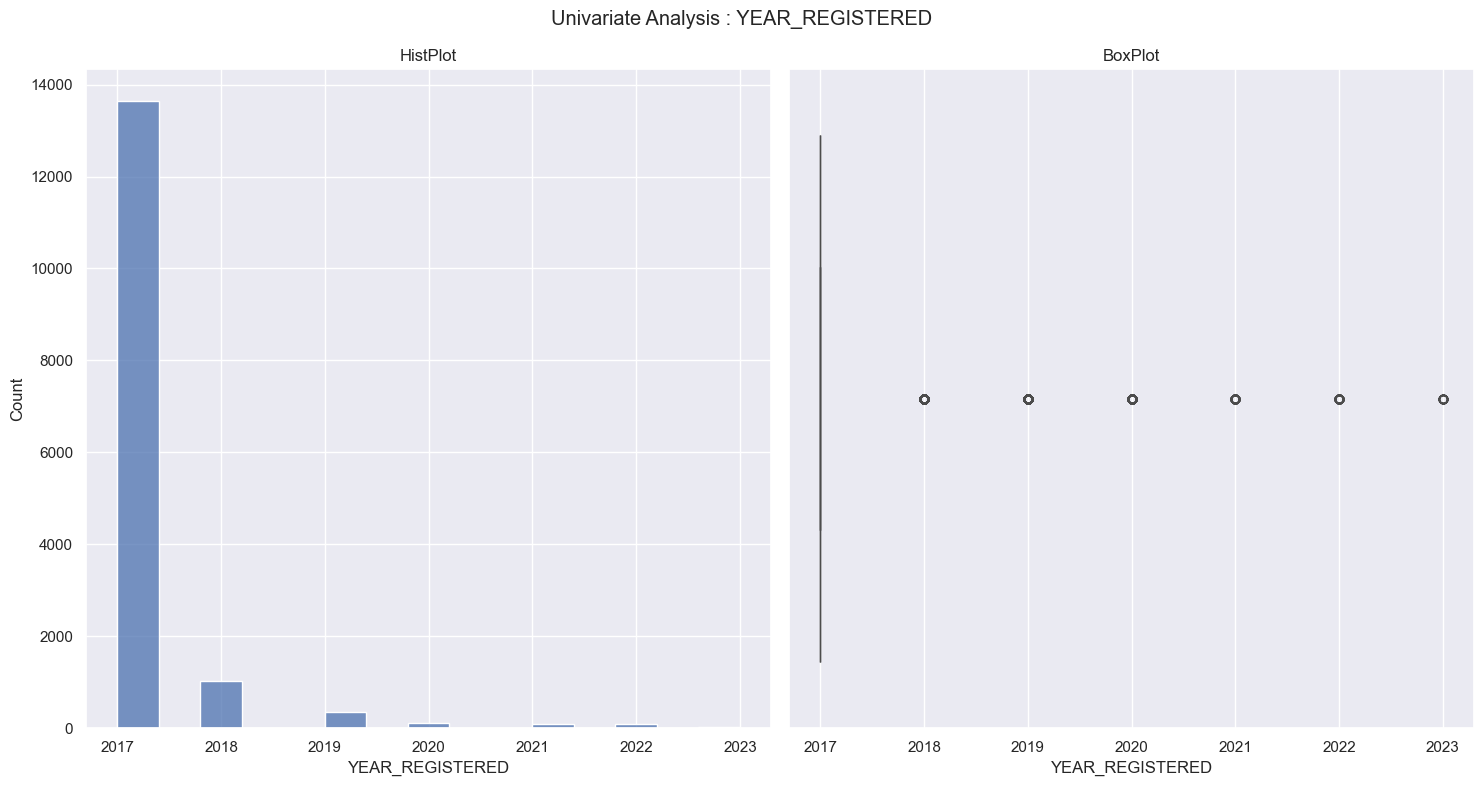

In [122]:
univariate_plot(df_new, "YEAR_REGISTERED")

**YEAR BUILT**

In [123]:
df_new["YEAR_BUILT"].describe().reset_index().T

0            1          2       3       4       5       6  \
index         count         mean        std     min     25%     50%     75%   
YEAR_BUILT  15332.0  1961.218041  19.058175  1805.0  1955.0  1961.0  1970.0   

                 7  
index          max  
YEAR_BUILT  2022.0

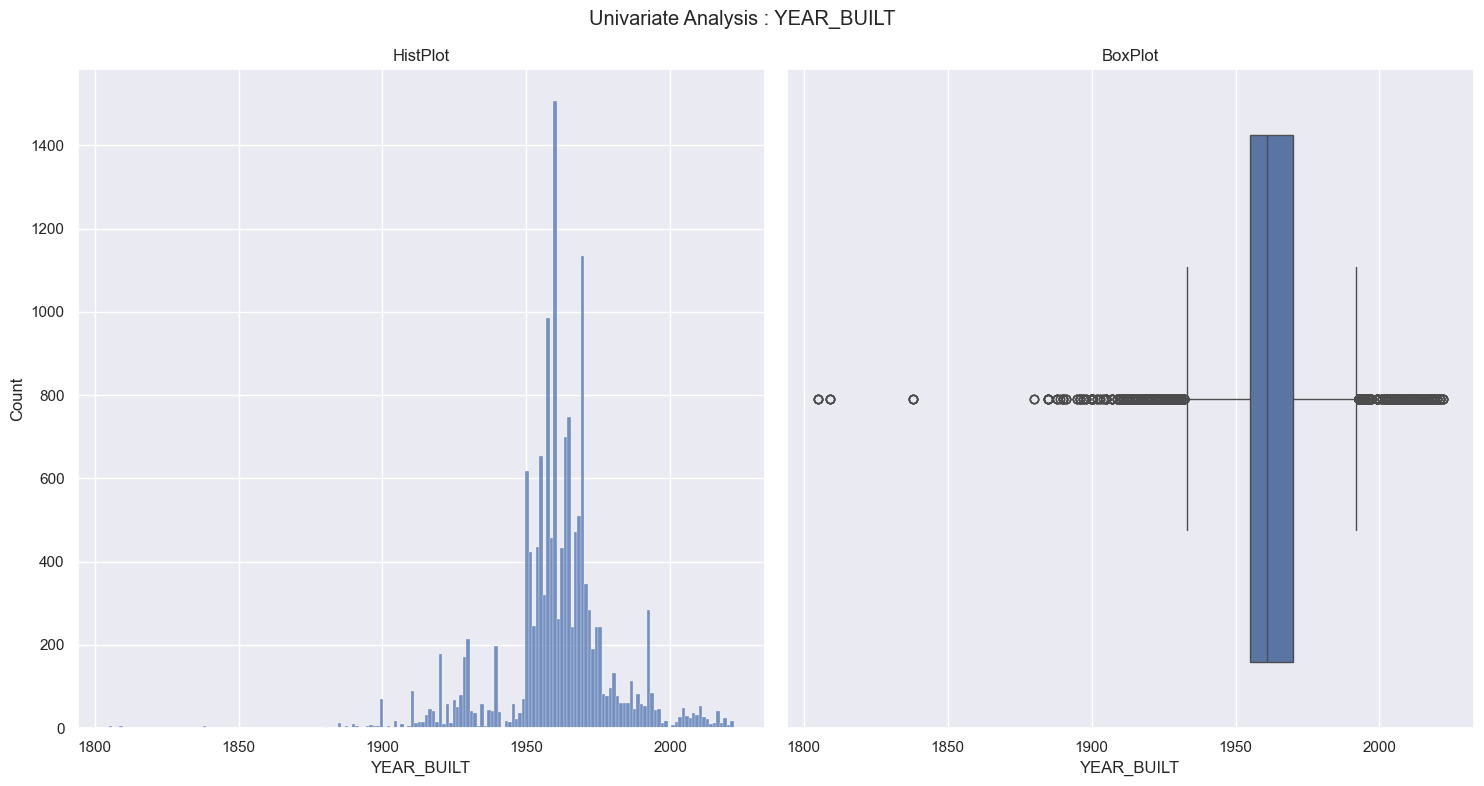

In [124]:
univariate_plot(df_new, "YEAR_BUILT")

**YEAR EVALUATED**

In [125]:
df_new["YEAR_EVALUATED"].describe().reset_index().T

0            1         2       3       4       5  \
index             count         mean       std     min     25%     50%   
YEAR_EVALUATED  15332.0  2019.957344  2.258405  2017.0  2018.0  2020.0   

                     6       7  
index              75%     max  
YEAR_EVALUATED  2022.0  2024.0

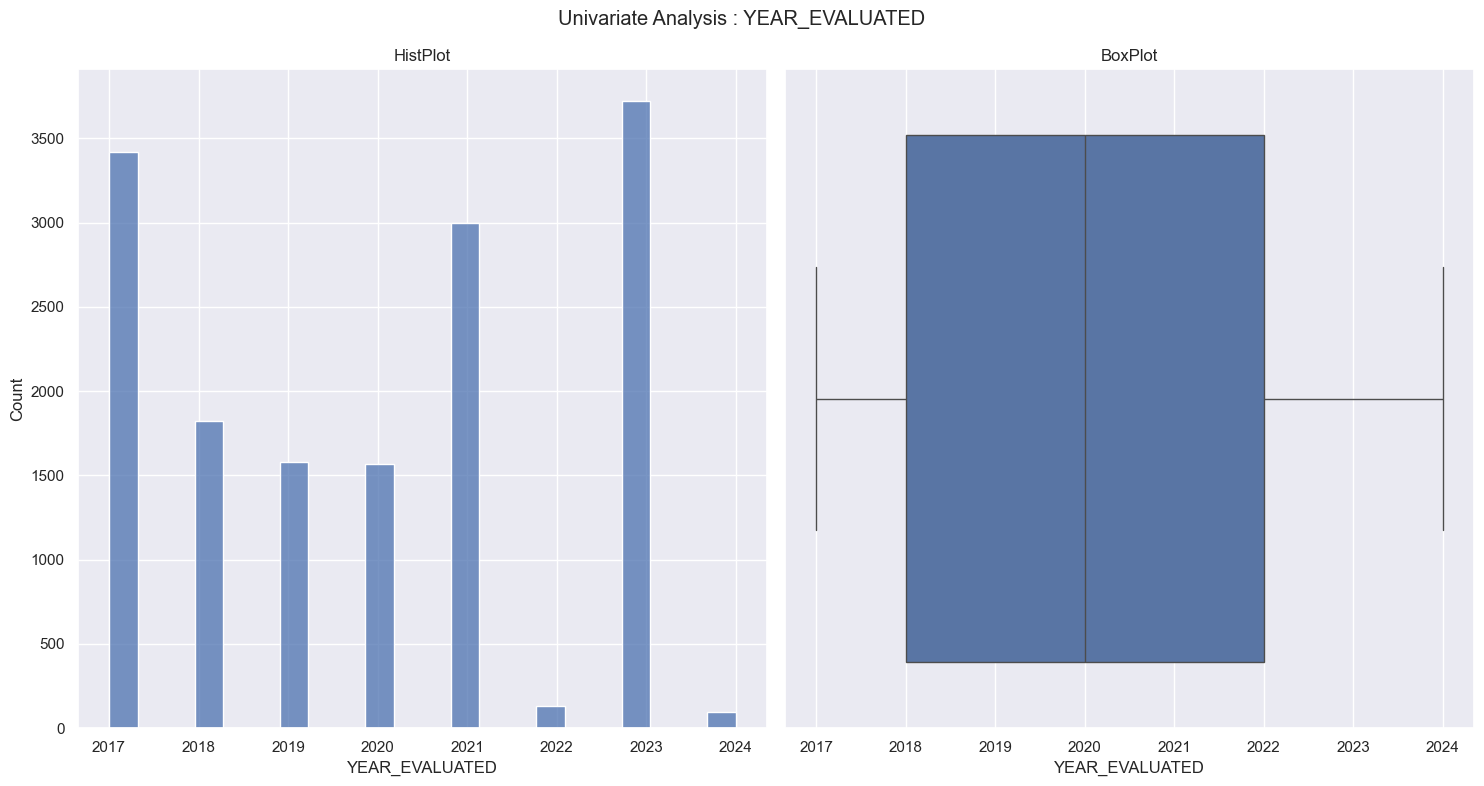

In [126]:
univariate_plot(df_new, "YEAR_EVALUATED")

**CONFIRMED STOREYS**

In [127]:
df_new["CONFIRMED_STOREYS"].describe().reset_index().T

0       1         2    3    4    5     6     7
index                count    mean       std  min  25%  50%   75%   max
CONFIRMED_STOREYS  15332.0  7.6461  6.290749  3.0  3.0  4.0  10.0  51.0

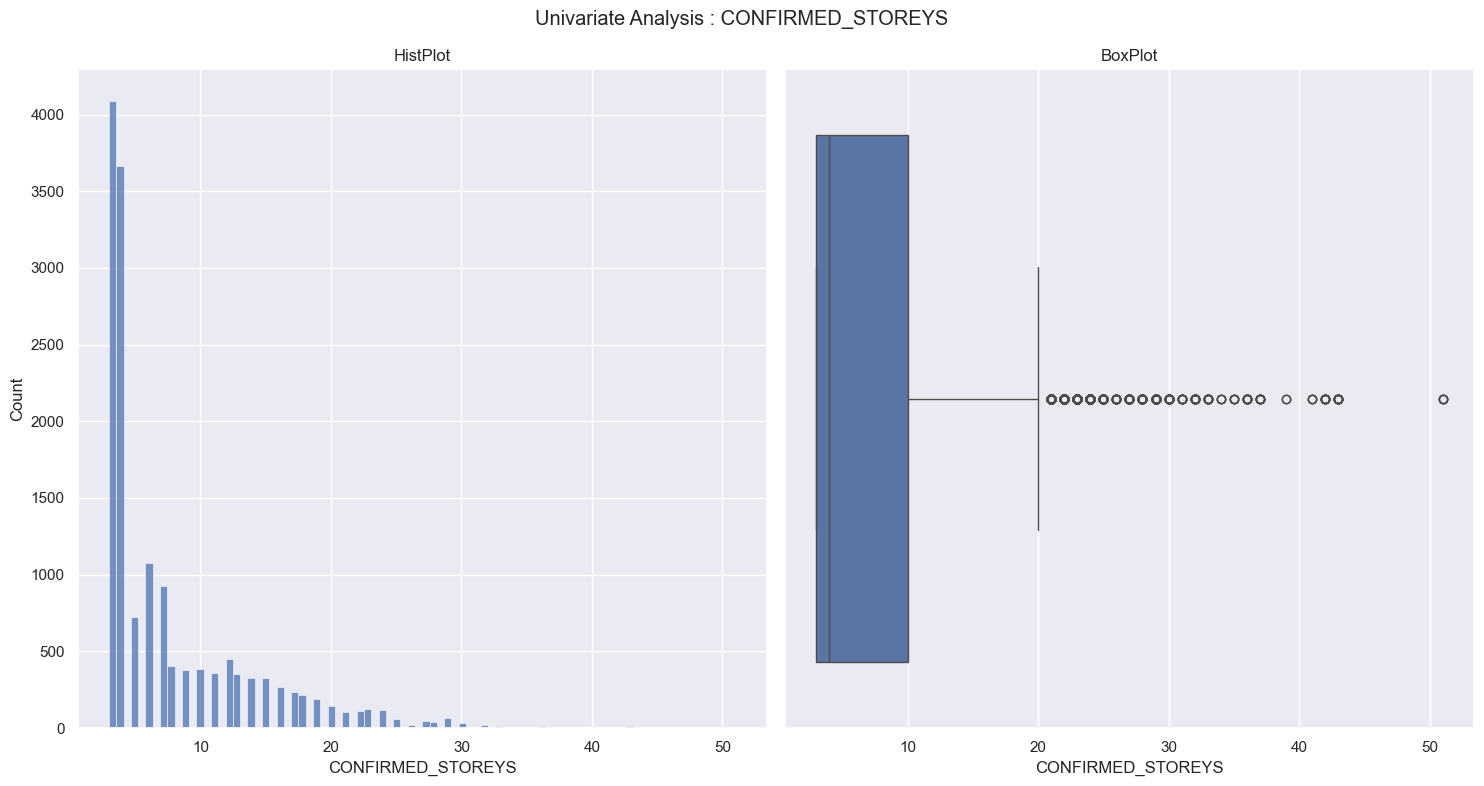

In [128]:
univariate_plot(df_new, "CONFIRMED_STOREYS")

**CONFIRMED UNITS**

In [129]:
df_new["CONFIRMED_UNITS"].describe().reset_index().T

0          1          2     3     4     5      6      7
index              count       mean        std   min   25%   50%    75%    max
CONFIRMED_UNITS  15332.0  88.060984  95.651765  10.0  24.0  48.0  120.0  793.0

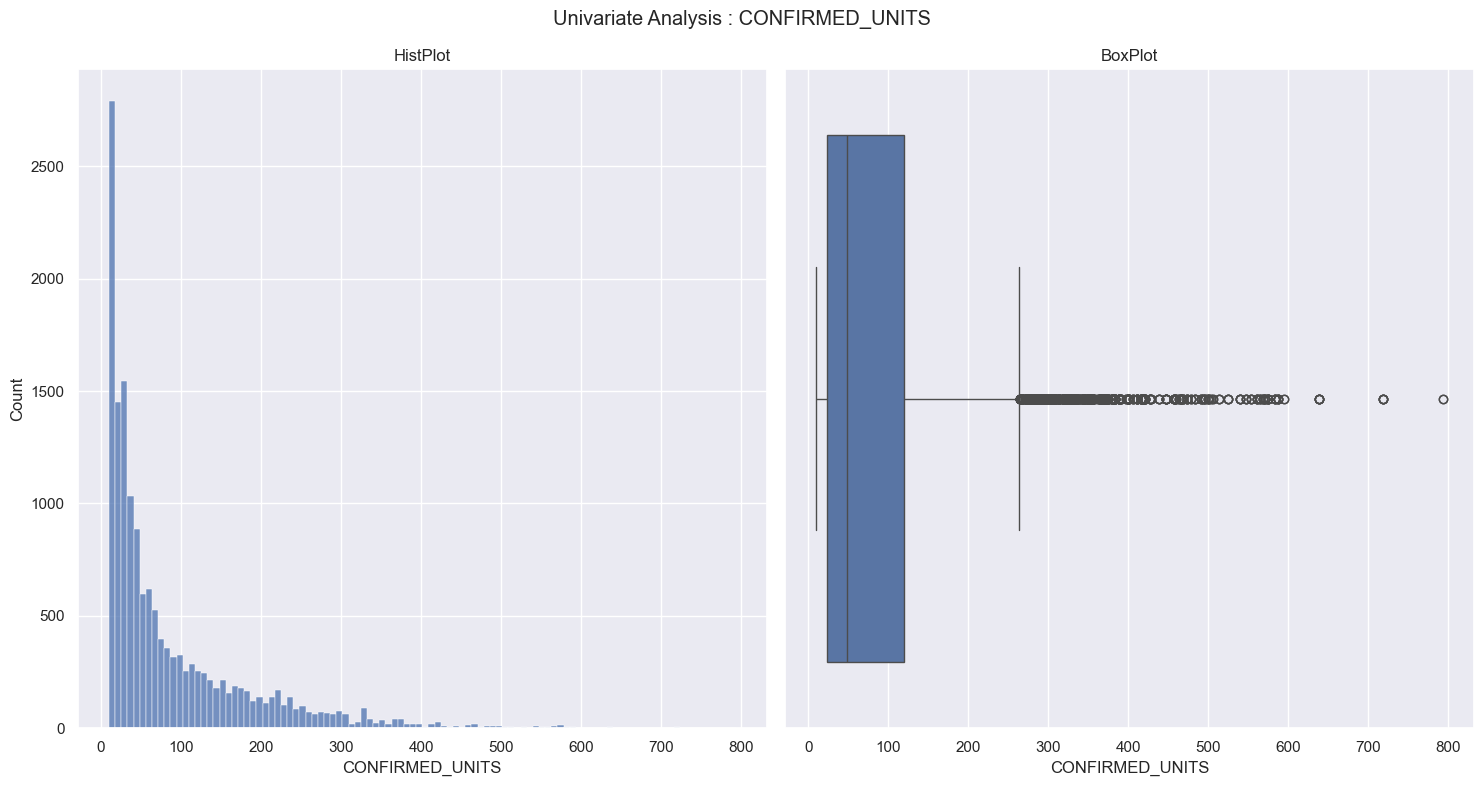

In [130]:
univariate_plot(df_new, "CONFIRMED_UNITS")

**SCORE**

In [131]:
df_new["SCORE"].describe().reset_index().T

0          1          2    3     4     5     6      7
index    count       mean        std  min   25%   50%   75%    max
SCORE  15332.0  75.054266  10.633685  0.0  67.0  76.0  82.0  100.0

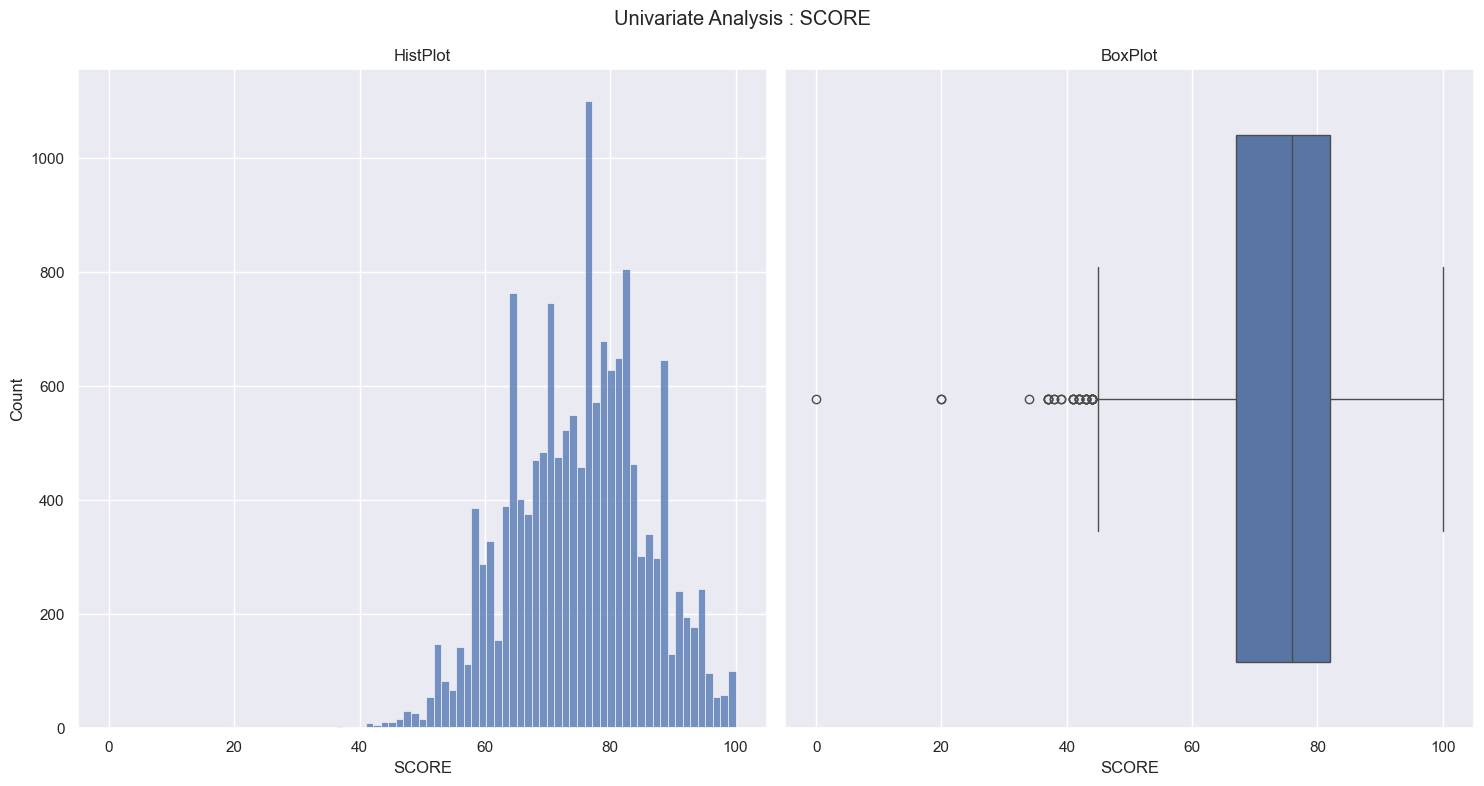

In [132]:
univariate_plot(df_new, "SCORE")

### Bivariate Analysis

**YEAR BUILT vs SCORE**

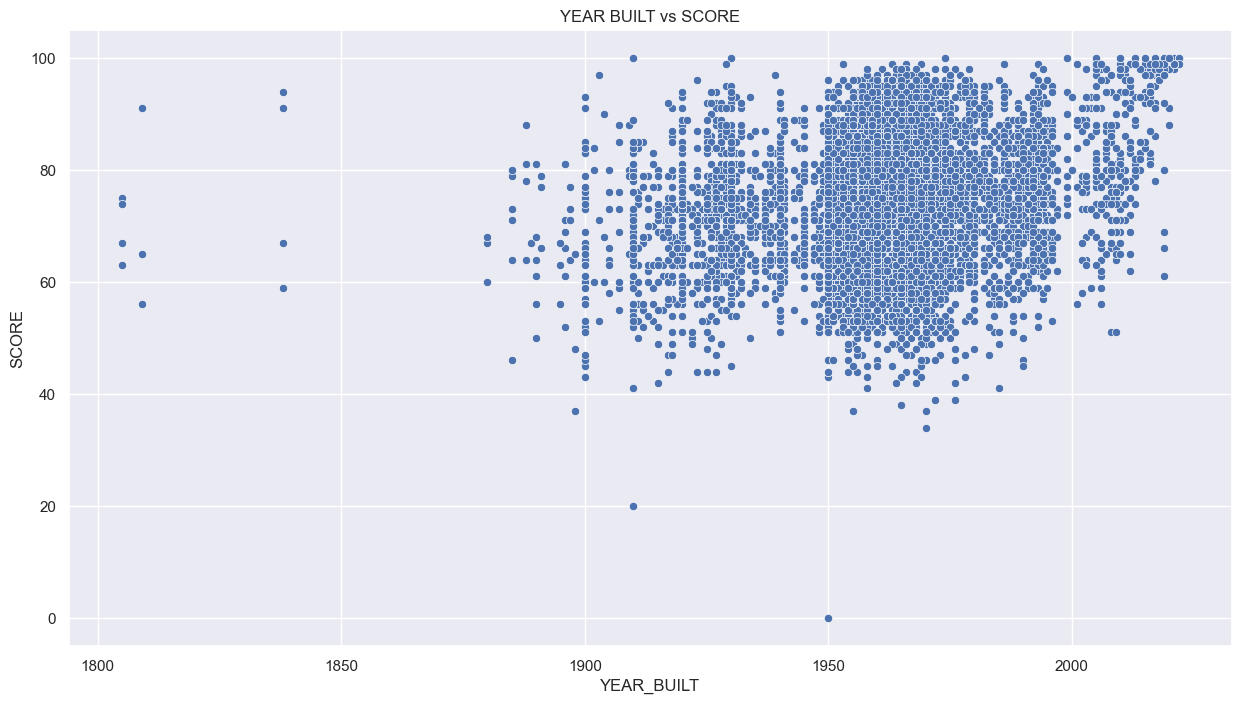

In [133]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_new, x = "YEAR_BUILT", y = "SCORE")
plt.title("YEAR BUILT vs SCORE")
plt.show()

**CONFIRMED UNITS vs SCORE**

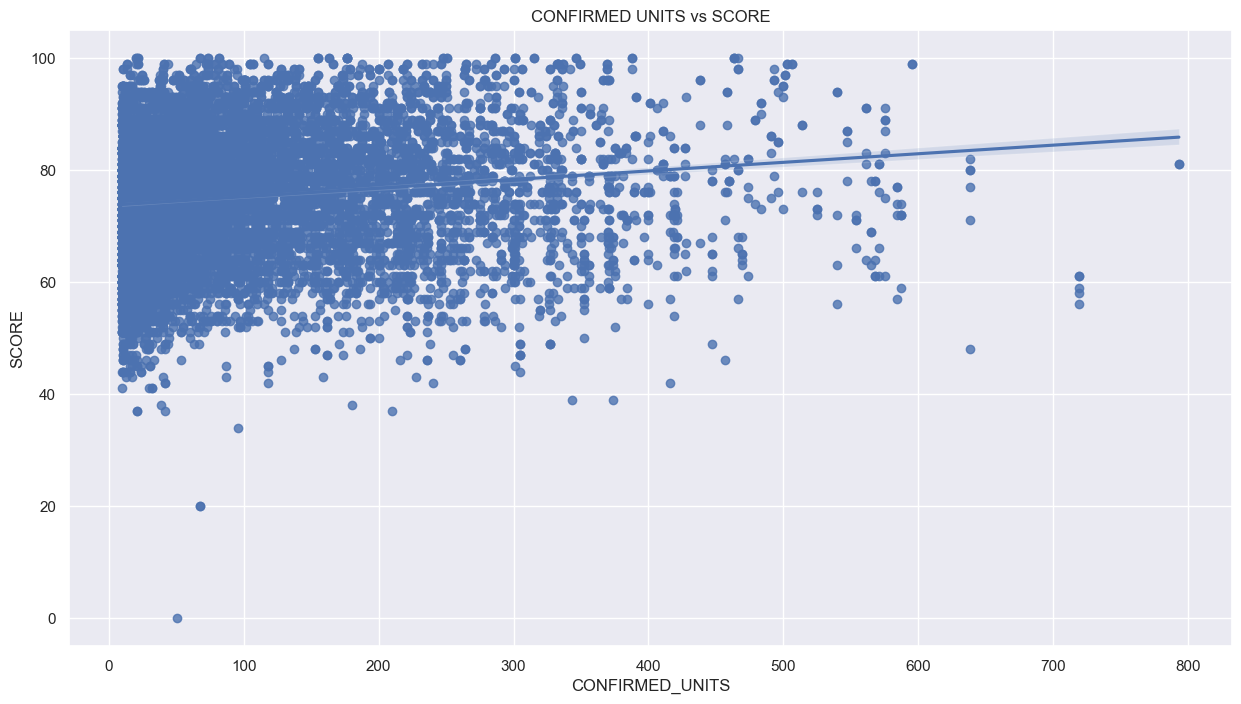

In [134]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_UNITS", y = "SCORE")
plt.title("CONFIRMED UNITS vs SCORE")
plt.show()

**CONFIRMED STOREYS vs SCORE**

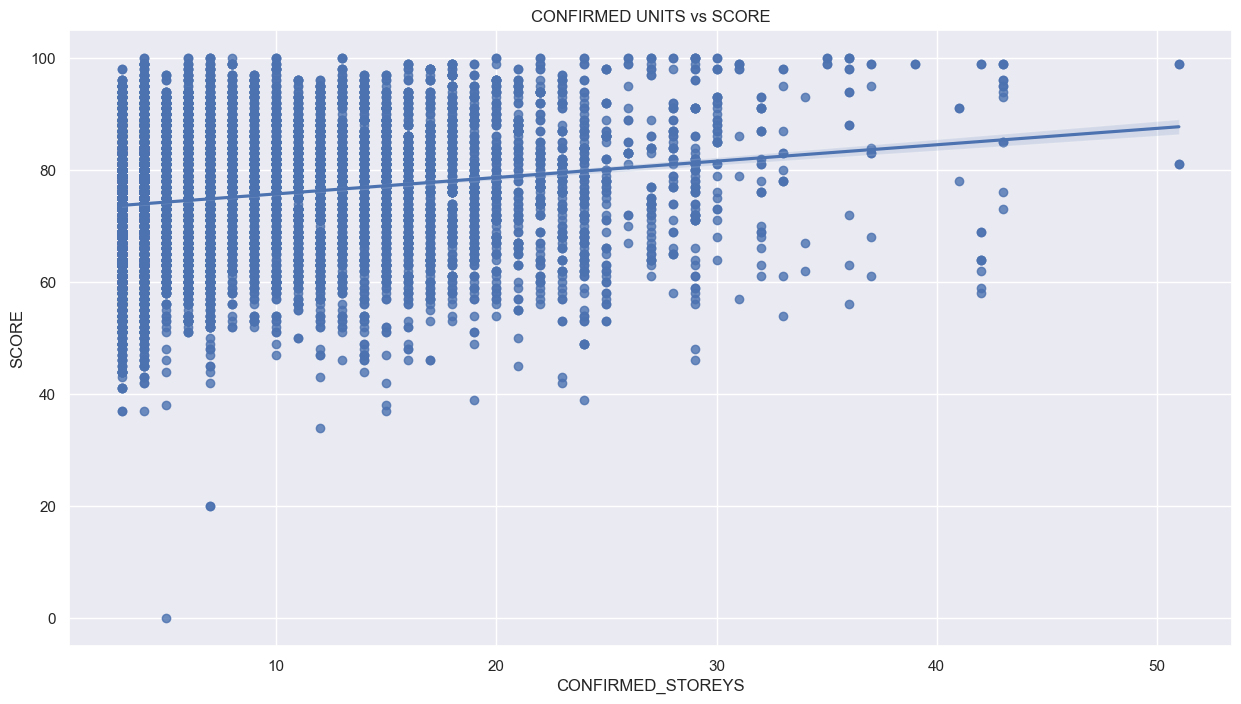

In [135]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_STOREYS", y = "SCORE")
plt.title("CONFIRMED UNITS vs SCORE")
plt.show()

**WARD vs SCORE**

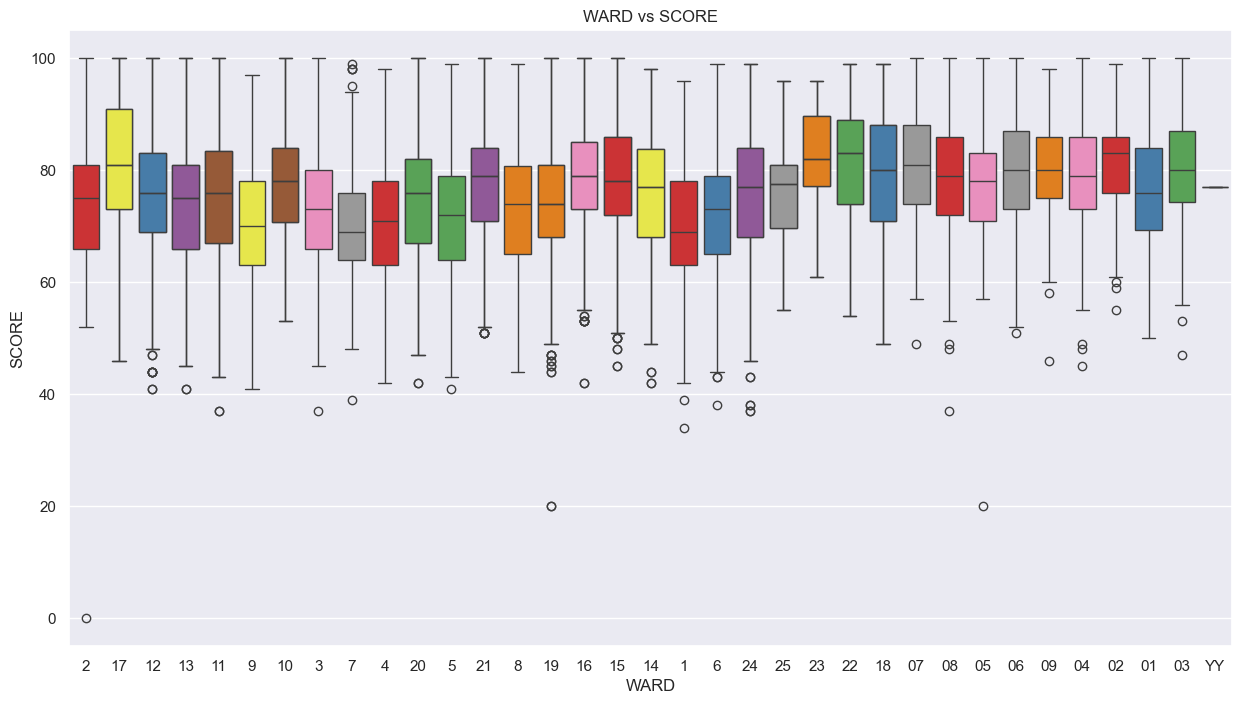

In [136]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_new, x = "WARD", y = "SCORE", palette = "Set1")
plt.title("WARD vs SCORE")
plt.show()

**WARDNAME vs SCORE**

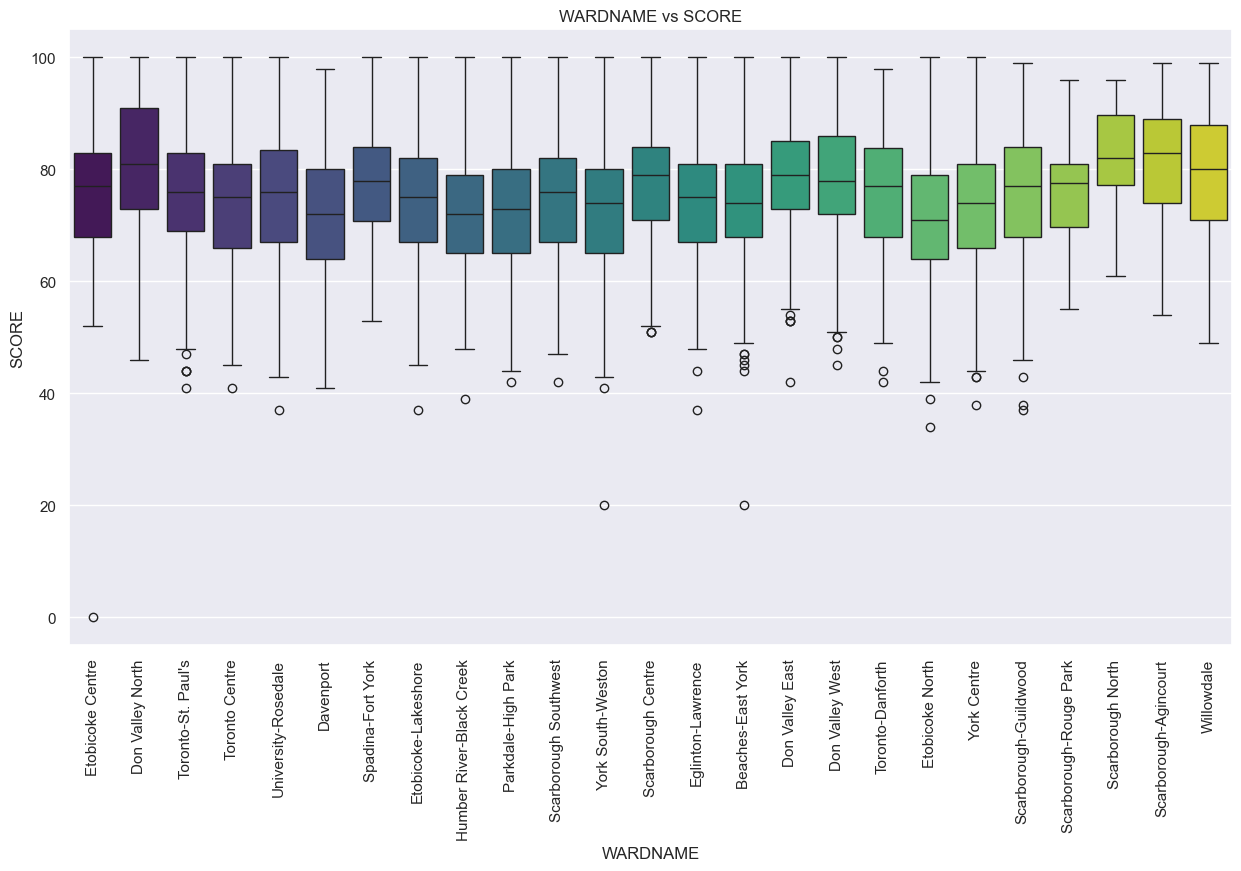

In [137]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_new, x = "WARDNAME", y = "SCORE", palette = "viridis")
plt.title("WARDNAME vs SCORE")
plt.xticks(rotation = 90)
plt.show()

**PROPERTY TYPE vs SCORE**

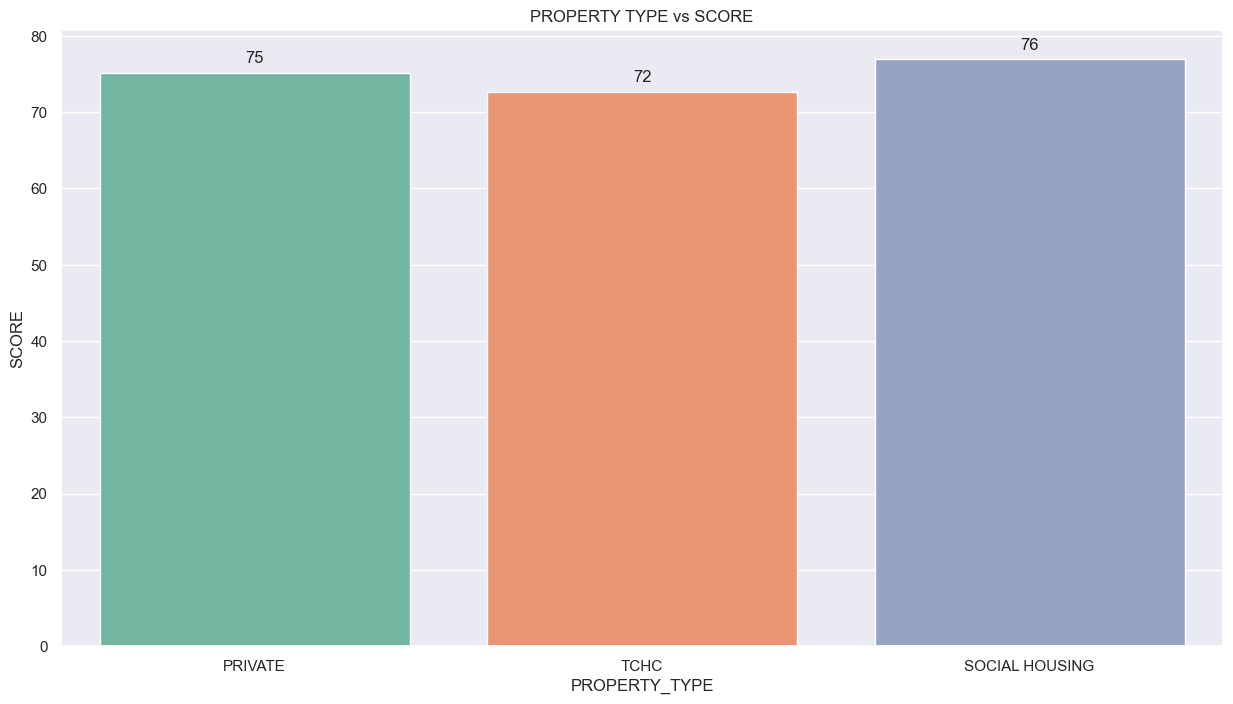

In [ ]:
plt.figure(figsize = [15,8])
ax = sns.barplot(data = df_new, x = "PROPERTY_TYPE", y = "SCORE", palette = "Set2", estimator = "mean", errorbar = ("ci", 0))

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("PROPERTY TYPE vs SCORE")
plt.show()

**YEAR EVALUATED vs SCORE**

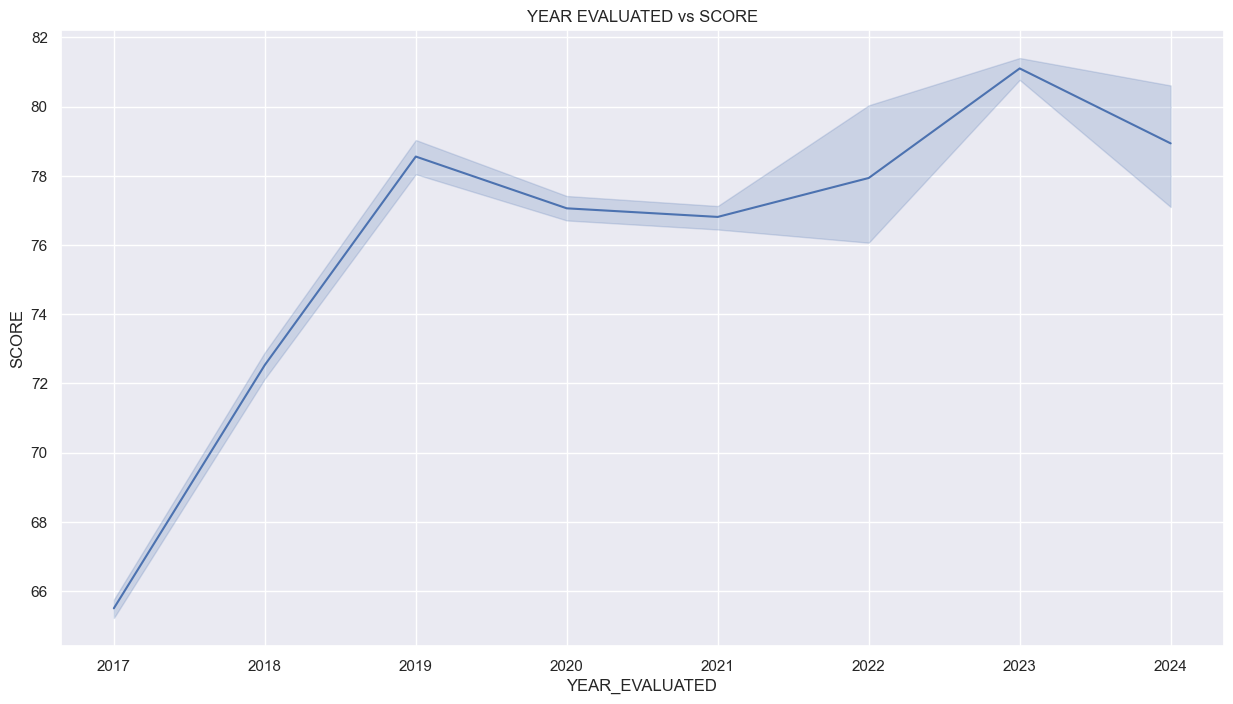

In [139]:
plt.figure(figsize = [15,8])
ax = sns.lineplot(data = df_new, x = "YEAR_EVALUATED", y = "SCORE")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("YEAR EVALUATED vs SCORE")
plt.show()

### Multivariate Analysis

**YEAR BUILT, CONFIRMED UNITS, and SCORE**

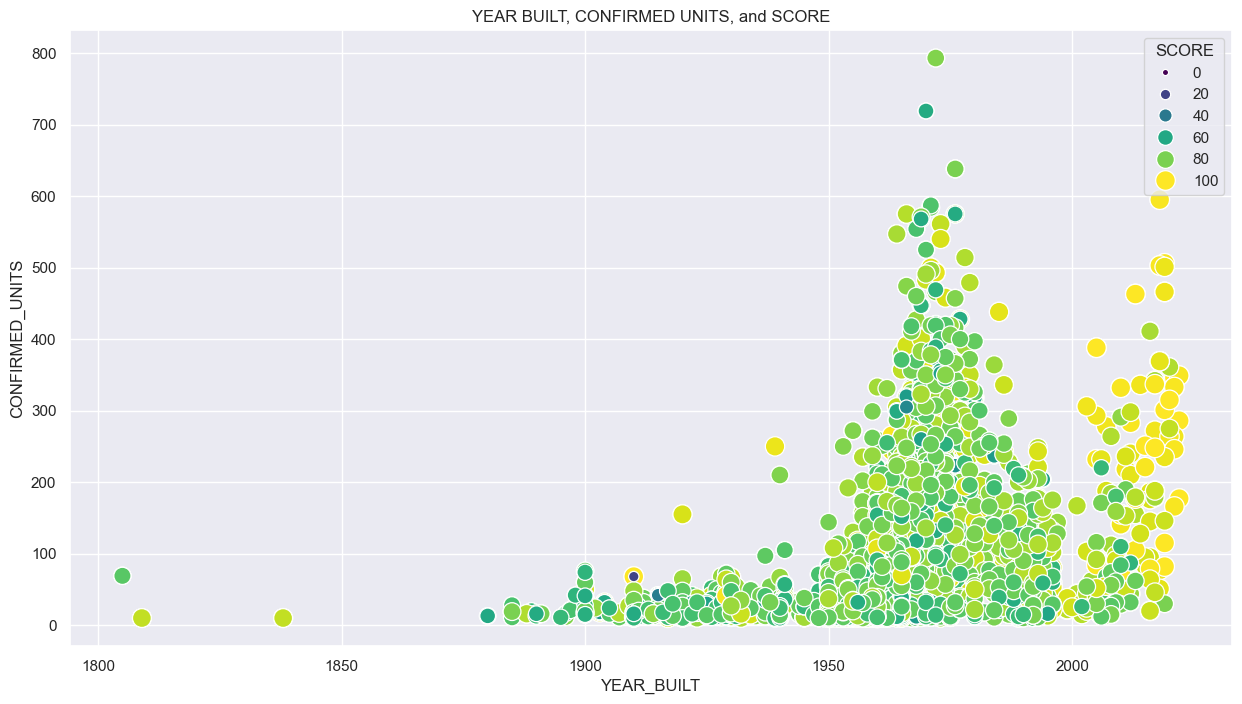

In [140]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_new, x = 'YEAR_BUILT', y = 'CONFIRMED_UNITS', 
                hue='SCORE', palette = 'viridis', 
                size = 'SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and SCORE")
plt.show()

**PROPERTY TYPE, WARD, and SCORE**

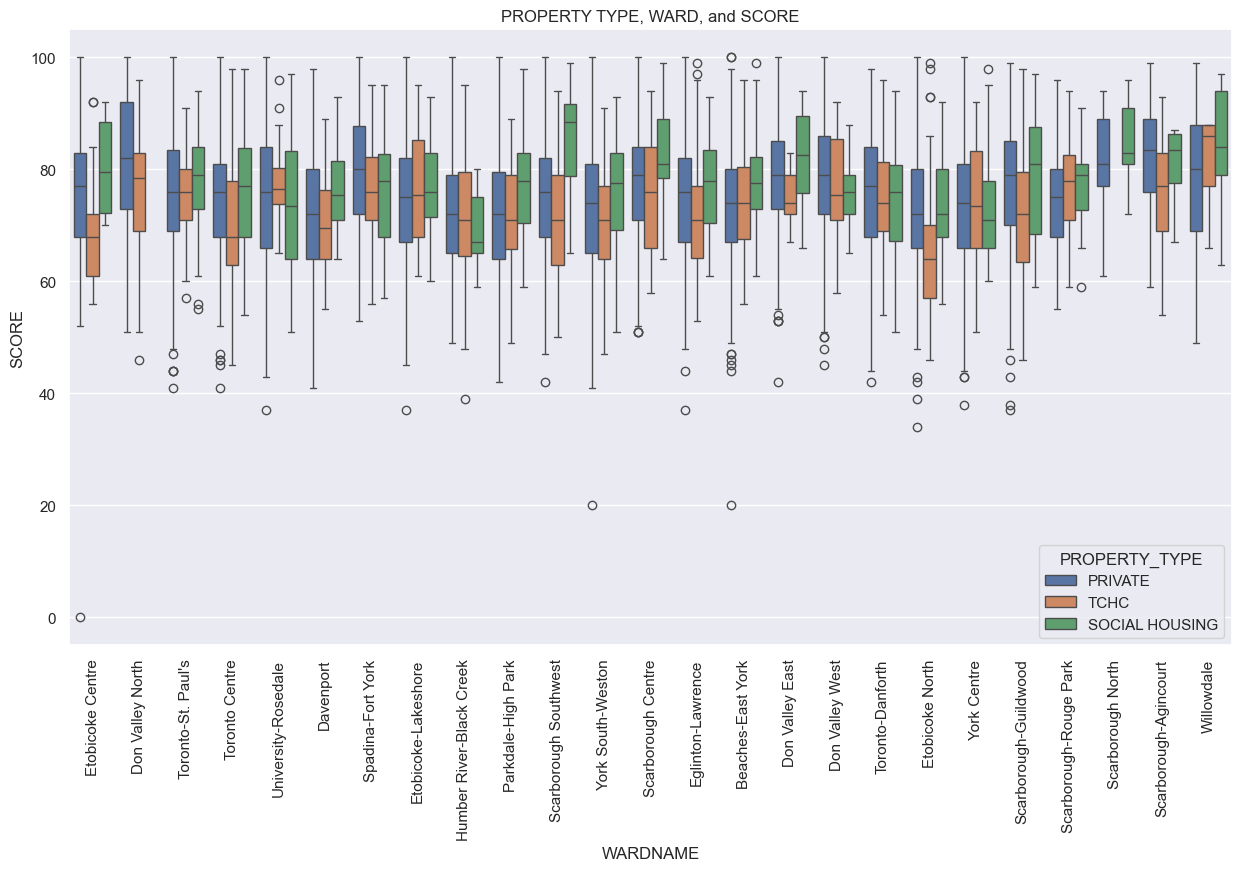

In [141]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'WARDNAME', y = 'SCORE', hue = 'PROPERTY_TYPE')
plt.title('PROPERTY TYPE, WARD, and SCORE')
plt.xticks(rotation = 90)
plt.show()

**LATITUDE, LONGITUDE, and SCORE**

In [142]:
fig = px.scatter_mapbox(df_new, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "SCORE",
                        size = "SCORE",
                        hover_name = "SITE_ADDRESS",
                        hover_data = ["YEAR_BUILT", "CONFIRMED_UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

**CORRELATION MATRIX**

In [143]:
df_new.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

<Axes: >

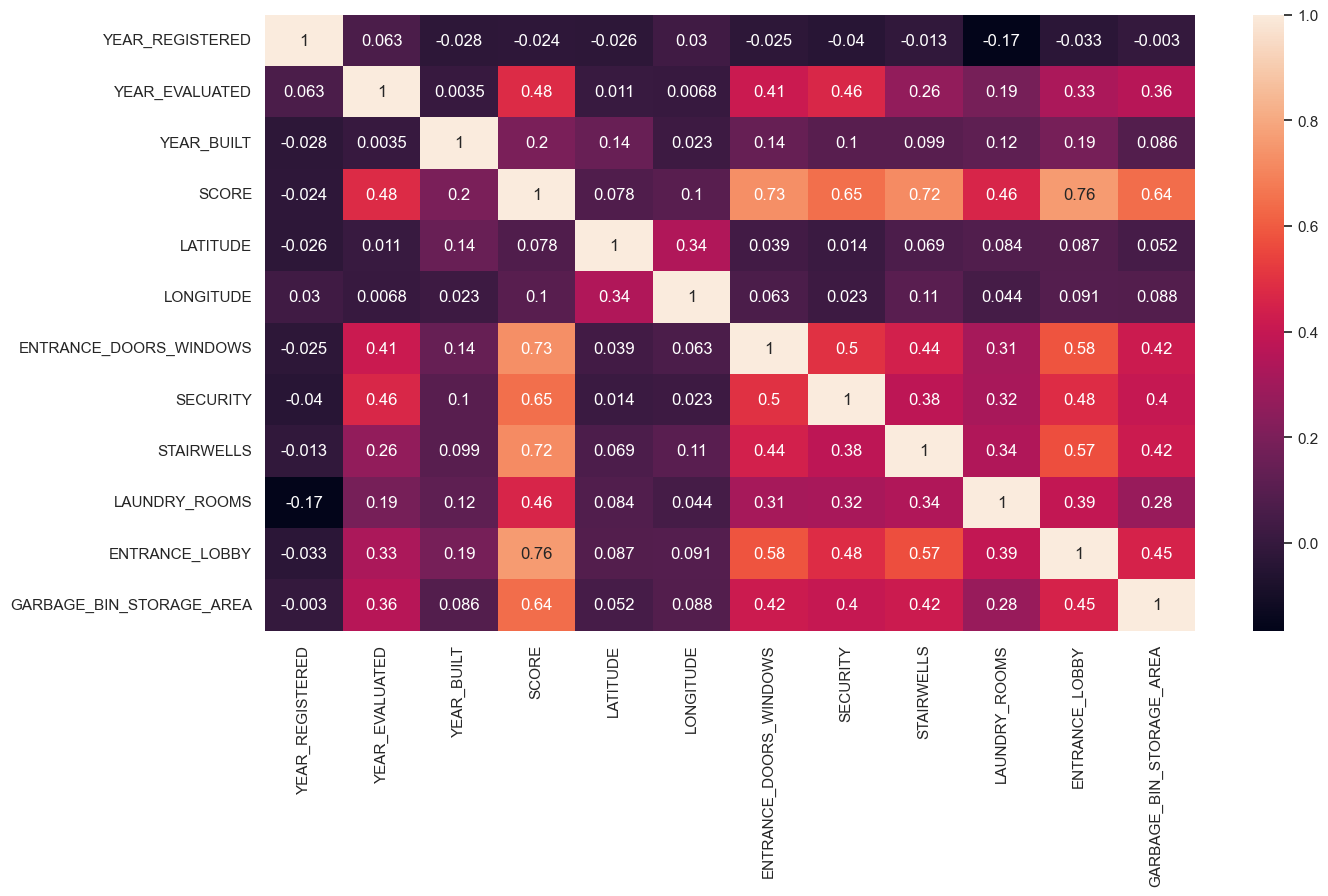

In [144]:
plt.figure(figsize = [15,8])
cols = ['YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT','SCORE', 'LATITUDE', 'LONGITUDE', 'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS', 'ENTRANCE_LOBBY', 'GARBAGE_BIN_STORAGE_AREA']
sns.heatmap(df_new[cols].corr(), annot = True)

In [147]:
df_new

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT  \
0        1  4304347             2018            2021        1999   
1        2  5156815             2023            2023        1973   
2        3  5156814             2023            2023        1973   
3        4  5157421             2023            2023        1973   
4        5  5156871             2023            2023        1973   
...    ...      ...              ...             ...         ...   
3567  3568  4154044             2018            2020        1966   
3568  3569  4153497             2018            2020        1965   
3569  3570  4285160             2018            2020        1950   
3570  3571  4153995             2017            2020        1948   
3571  3572  4154708             2020            2020        1956   

     PROPERTY_TYPE WARD               WARDNAME  \
0          PRIVATE    2       Etobicoke Centre   
1             TCHC   17       Don Valley North   
2             TCHC   17       Don Valley North   
3             TCHC   17       Don Valley North   
4             TCHC   17       Don Valley North   
...            ...  ...                    ...   
3567       PRIVATE   20  Scarborough Southwest   
3568       PRIVATE   11    University-Rosedale   
3569       PRIVATE   11    University-Rosedale   
3570       PRIVATE   11    University-Rosedale   
3571       PRIVATE   19      Beaches-East York   

                                  SITE_ADDRESS  CONFIRMED_STOREYS  ...  \
0     ** CREATED IN ERROR ** 399 THE WEST MALL                 22  ...   
1                           15 FIELD SPARROWAY                  4  ...   
2                           13 FIELD SPARROWAY                  4  ...   
3                             6 TREE SPARROWAY                  4  ...   
4                             2 TREE SPARROWAY                  4  ...   
...                                        ...                ...  ...   
3567                         2511 GERRARD ST E                 14  ...   
3568                           55 GERRARD ST W                  8  ...   
3569                           77 GERRARD ST W                  3  ...   
3570                           99 GERRARD ST W                  3  ...   
3571                           2263 QUEEN ST E                  4  ...   

      EXTERIOR_WALKWAYS BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
0                     5              5                            5   
1                     5              5                            4   
2                     4              5                            4   
3                     3              5                            4   
4                     5              5                            4   
...                 ...            ...                          ...   
3567                  3              2                            3   
3568                  3             -1                            4   
3569                  2              3                            4   
3570                  3              4                            4   
3571                  3              2                            3   

     PARKING_AREA  OTHER_FACILITIES   GRID   LATITUDE  LONGITUDE           X  \
0               5                 5  W0233  43.643781 -79.565456  299503.625   
1               3                 4  N1721  43.791143 -79.368820  315333.193   
2               3                 4  N1721  43.790920 -79.368771  315334.815   
3               3                 4  N1721  43.791384 -79.369630  315272.148   
4               3                 4  N1721  43.791511 -79.369045  315330.308   
...           ...               ...    ...        ...        ...         ...   
3567            3                -1  E2033  43.687387 -79.283619  322228.491   
3568            3                -1  S1145  43.658444 -79.383997  314140.697   
3569            4                -1  S1145        NaN        NaN  314029.142   
3570            3                -1  S1145     

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from rfpimp import importances, plot_importances

In [156]:
df_new.select_dtypes('object').columns

Index(['PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'EVALUATION_COMPLETED_ON', 'RESULTS_OF_SCORE', 'GRID'],
      dtype='object')

In [170]:
df_new['GRID']

0       W0233
1       N1721
2       N1721
3       N1721
4       N1721
        ...  
3567    E2033
3568    S1145
3569    S1145
3570    S1145
3571    S1942
Name: GRID, Length: 15332, dtype: object

In [181]:
X = pd.get_dummies(df_new.drop(columns=['SCORE', 'SITE_ADDRESS', 'WARDNAME','GRID','RESULTS_OF_SCORE', 'WARD', 'EVALUATION_COMPLETED_ON','PROPERTY_TYPE'], axis= 1))
y = df_new['SCORE']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=666)

In [183]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=666)

In [184]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=666)

In [185]:
y_pred = model.predict(X_test)

In [186]:
r2_score(y_test,y_pred)

0.976269283763711

In [187]:
mean_absolute_error(y_test, y_pred)

1.1987887186175414

In [188]:
imp = importances(model,X_test,y_test)

In [189]:
len(imp)

32

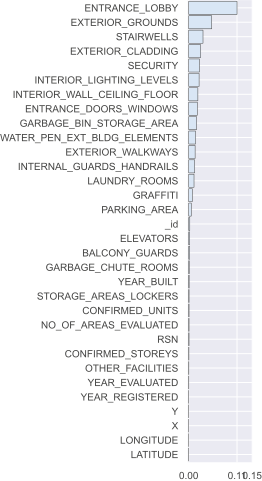

In [190]:
plot_importances(imp)

In [164]:
model.feature_importances_

array([5.54768405e-03, 3.02996397e-03, 2.82153149e-04, ...,
       1.08599900e-06, 1.31178767e-05, 0.00000000e+00])